# Predicting House Sale Prices in Ames, IA using Linear Regression
![housing](housing.jpg)
## Introduction
This data set describes the sale of individual residential property in Ames, Iowa from 2006 to 2010


## Data Dictionary
The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. [Here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) is a txt file. containing information on variables involved. 

### Resources
Data Docmentary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
Data can also be downloaded from [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
For in detail information, click [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

## Goal
In this project, we'll build a Linear Regression model and exploring ways to improve it by 
- Determining what features of the total 79 available are that best can be used as a predictor estimate for house sale price hence creating the best model based on linear regression for making the best posible accurate predictions for house prices.
- Determining how good the predictor equation is as a fit through root mean square error.
---

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from more_itertools import unique_everseen

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, RobustScaler, QuantileTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split, cross_validate
from sklearn.pipeline import Pipeline, make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats, special


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
# Display Settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [134]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

In [135]:
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [136]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

So there are some columns that are immediate candidates of being dropped out. `Order` and `PID` stand out of the list as they contain irrelevant information for analysis purpose

In [137]:
# Useless cols 
ames.drop(['Order', 'PID'], axis=1, inplace=True)

Columns such as `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace QU`, `Garage Finish` etc will be deleted as well because they contain a lot of Null values.

In [138]:
# Check whats wrong there in the columns that contain more than 5% NaNs
nan_more_than_5pc = [col for col in ames.columns if ames[col].isnull().sum()/ames.shape[0]*100 > 5]

ames[nan_more_than_5pc]

,Lot Frontage,Alley,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,141.0,NaN,Gd,Attchd,1960.0,Fin,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,Attchd,1961.0,Unf,TA,TA,NaN,MnPrv,NaN
2,81.0,NaN,NaN,Attchd,1958.0,Unf,TA,TA,NaN,NaN,Gar2
3,93.0,NaN,TA,Attchd,1968.0,Fin,TA,TA,NaN,NaN,NaN
4,74.0,NaN,TA,Attchd,1997.0,Fin,TA,TA,NaN,MnPrv,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,NaN,NaN,Detchd,1984.0,Unf,TA,TA,NaN,GdPrv,NaN
2926,NaN,NaN,NaN,Attchd,1983.0,Unf,TA,TA,NaN,MnPrv,NaN
2927,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MnPrv,Shed
2928,77.0,NaN,TA,Attchd,1975.0,RFn,TA,TA,NaN,NaN,NaN


In [139]:
ames[nan_more_than_5pc].isnull().sum().sort_values(ascending=False)

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Fireplace Qu     1422
Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Garage Type       157
dtype: int64

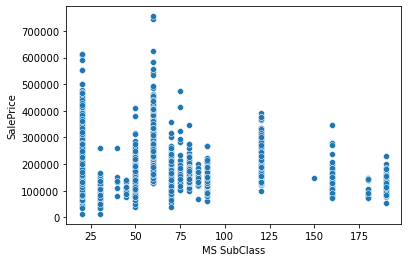

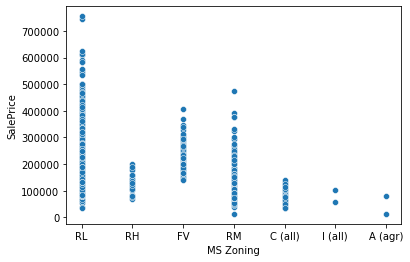

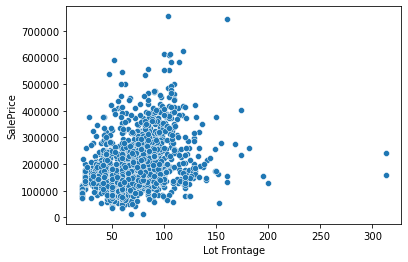

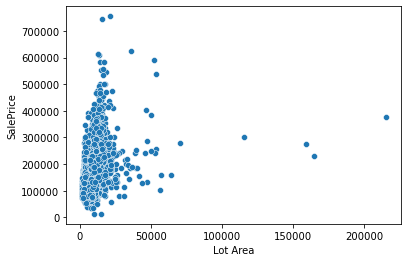

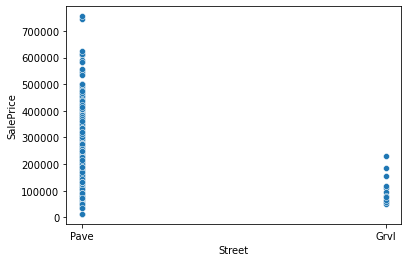

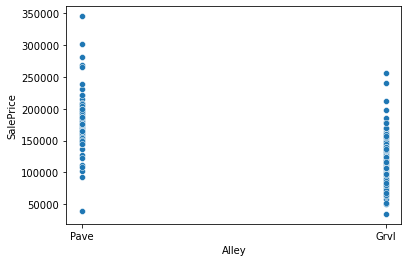

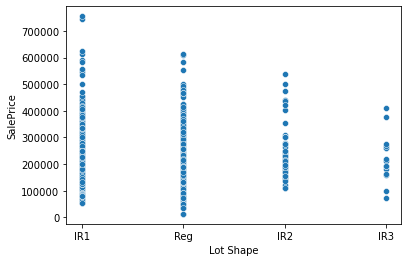

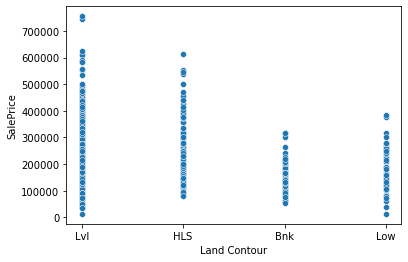

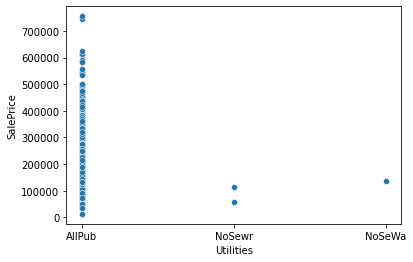

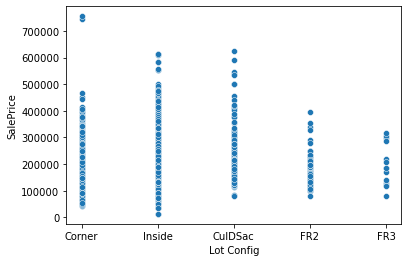

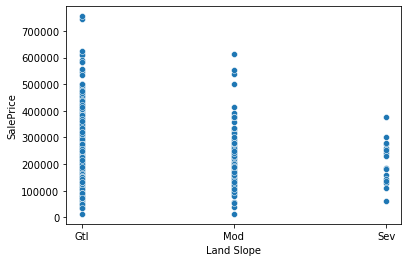

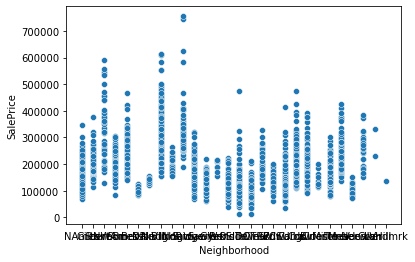

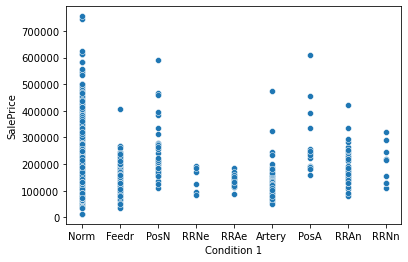

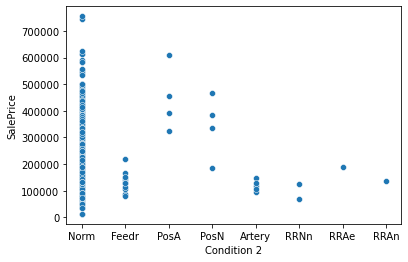

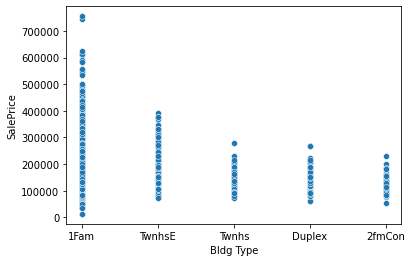

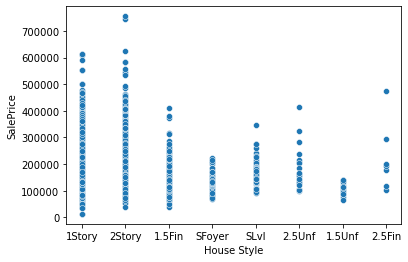

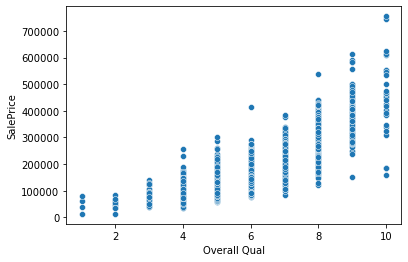

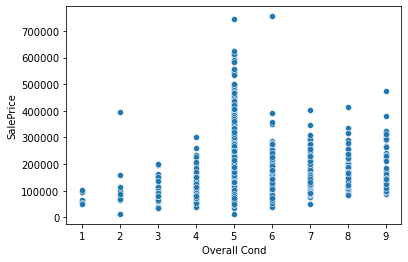

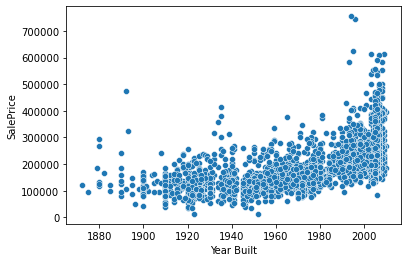

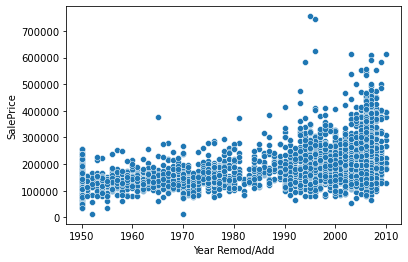

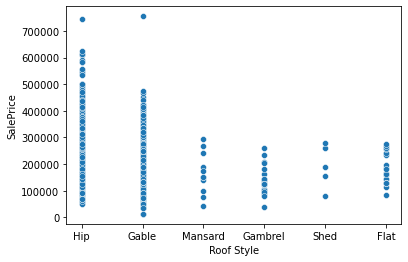

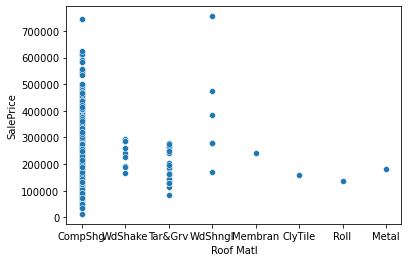

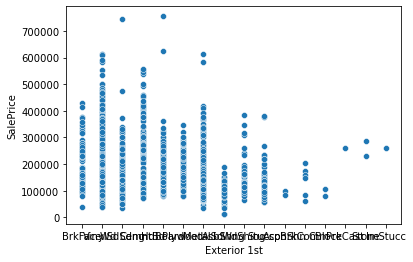

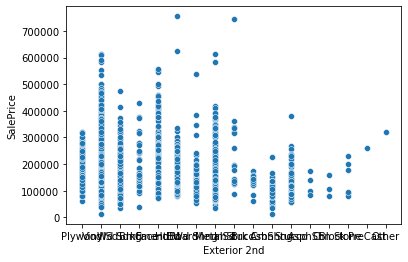

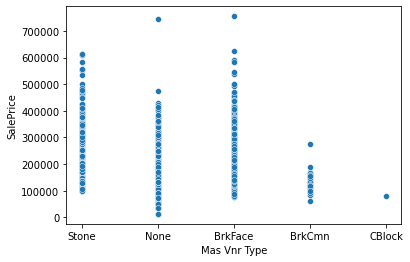

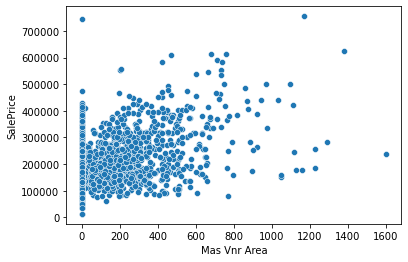

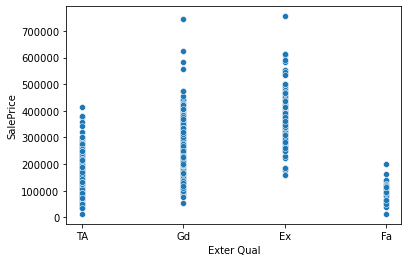

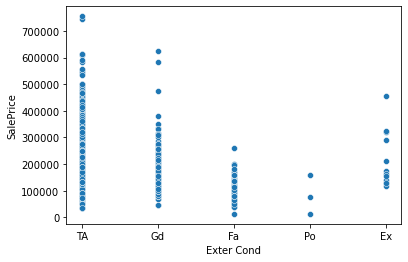

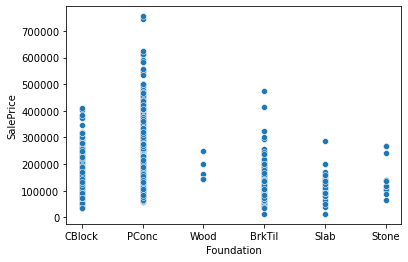

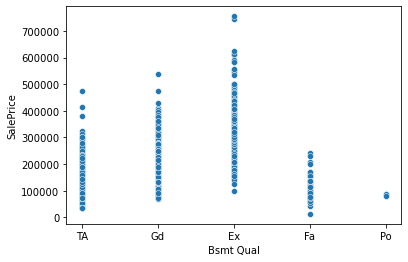

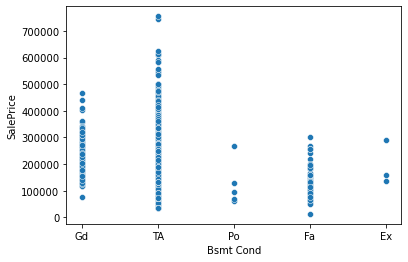

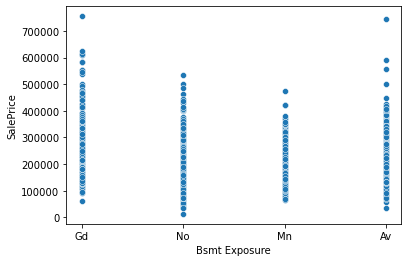

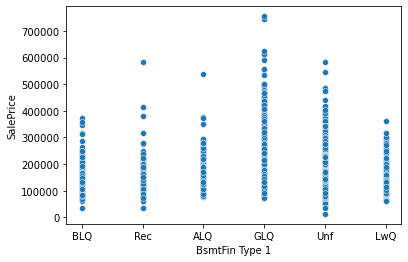

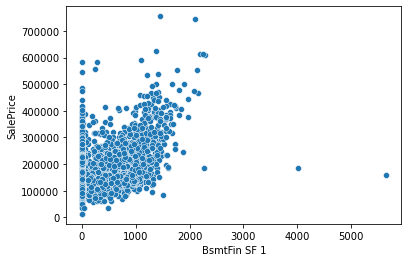

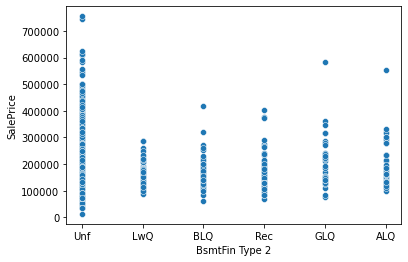

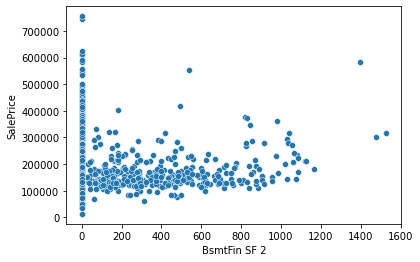

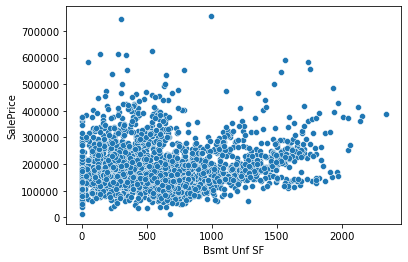

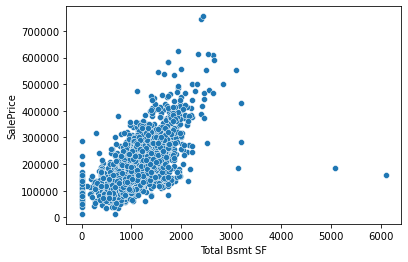

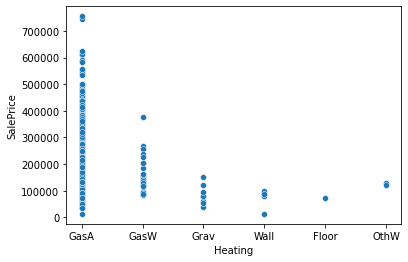

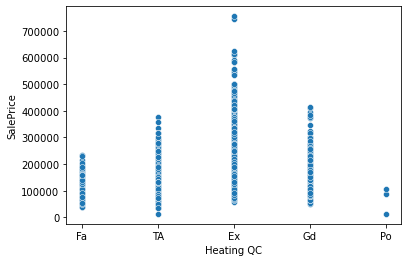

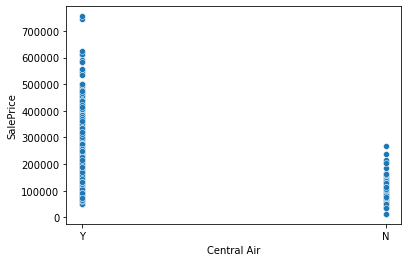

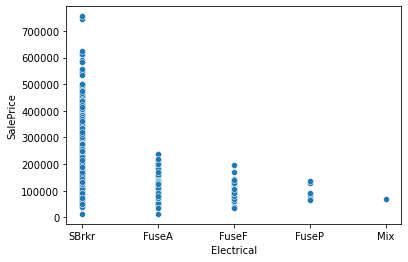

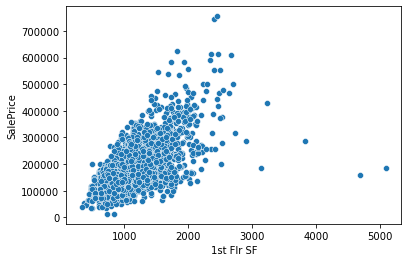

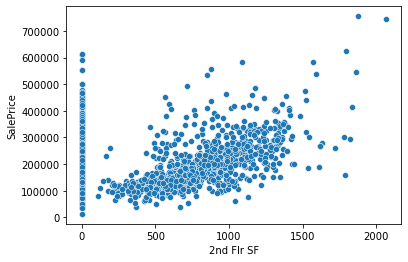

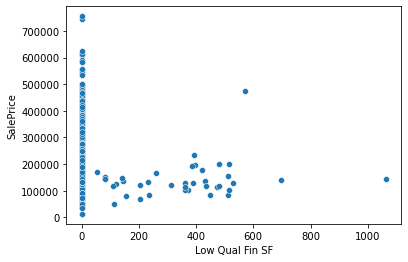

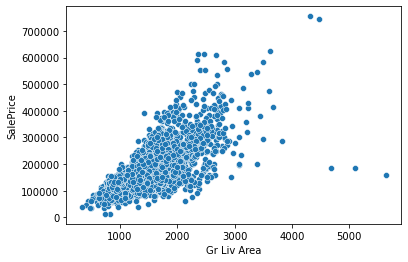

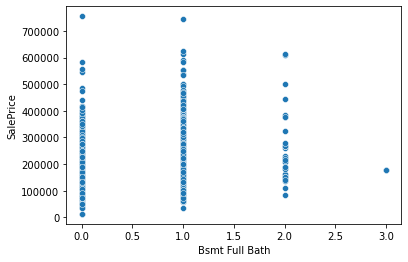

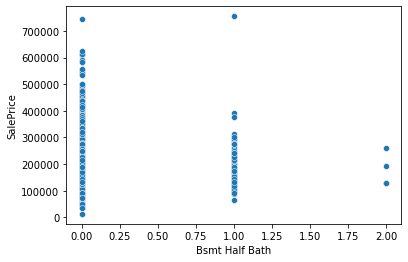

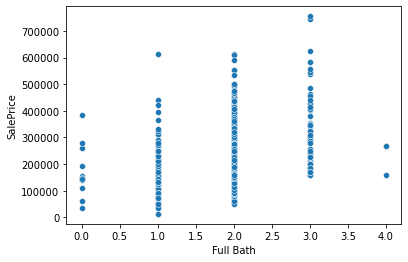

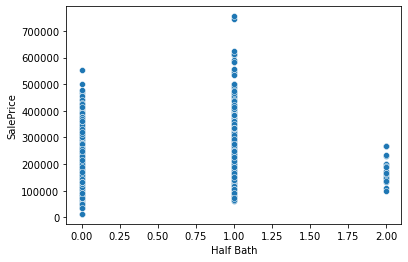

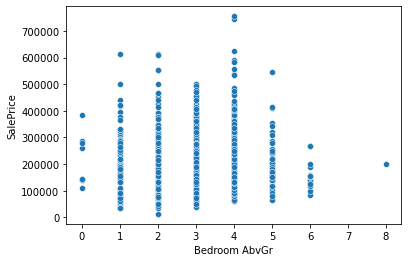

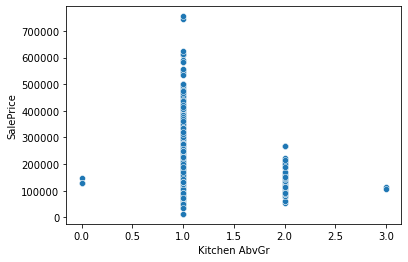

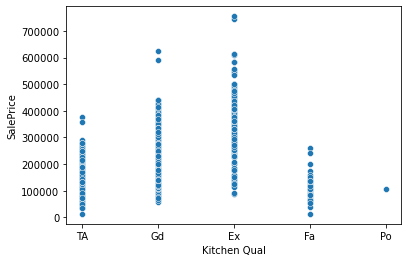

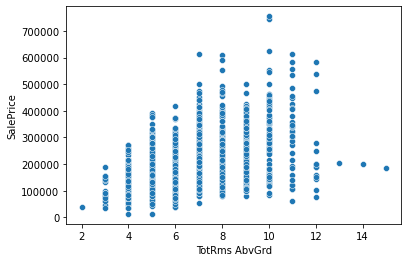

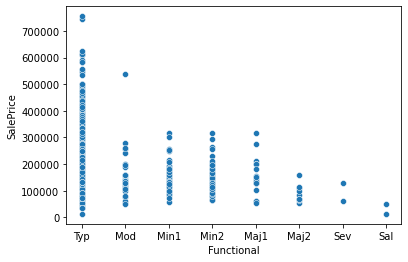

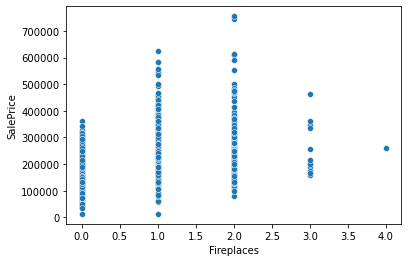

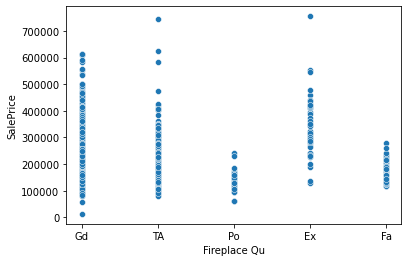

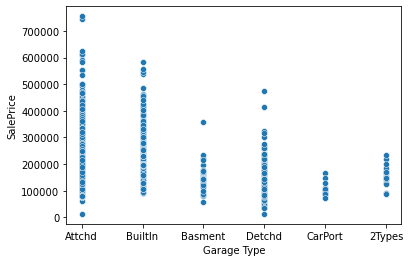

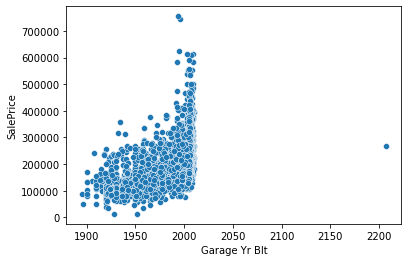

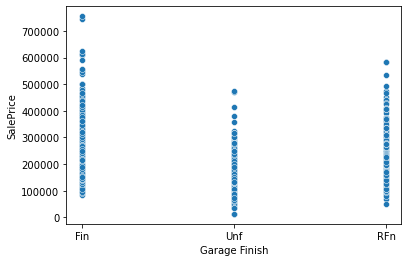

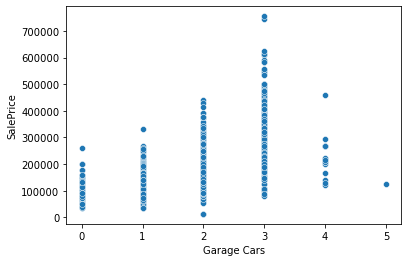

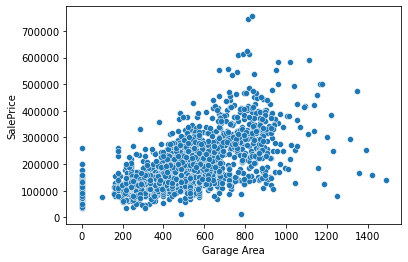

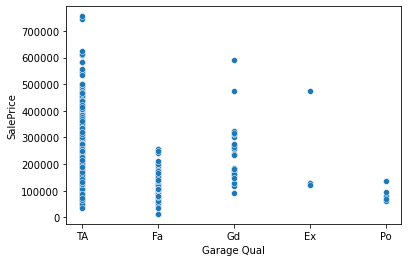

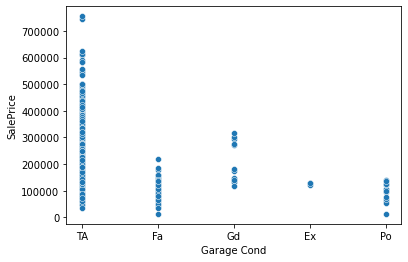

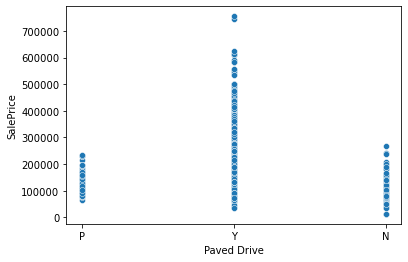

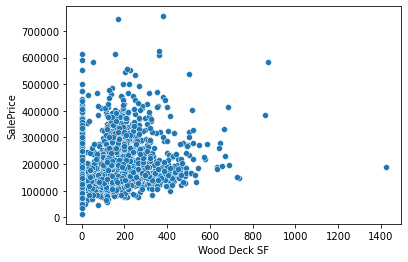

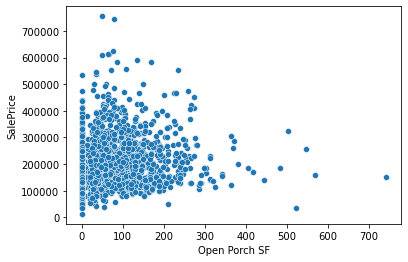

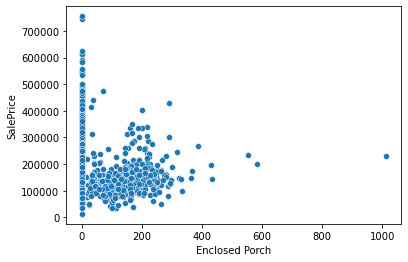

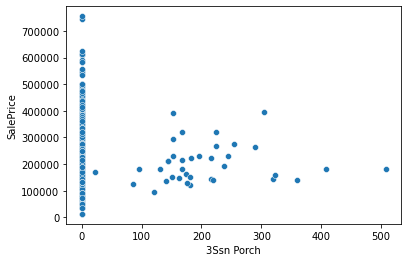

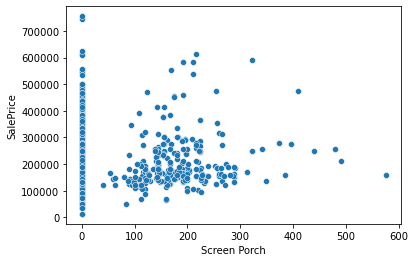

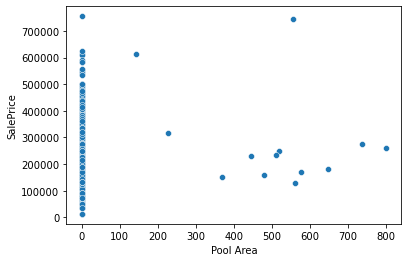

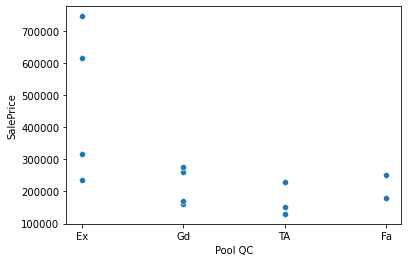

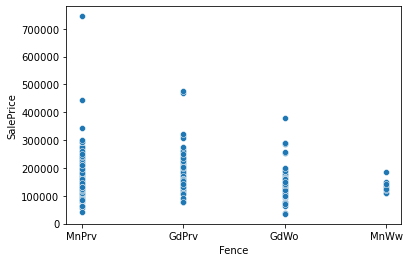

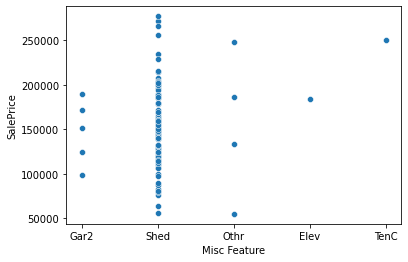

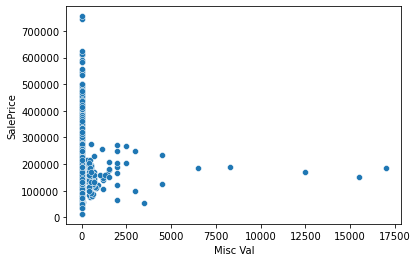

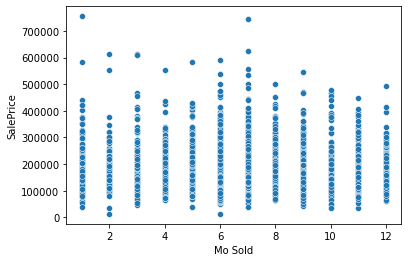

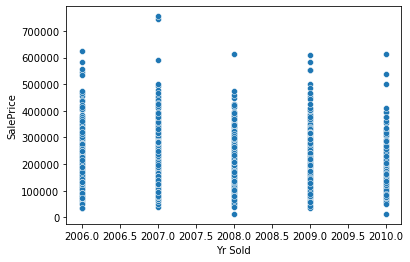

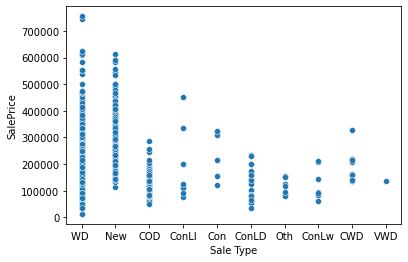

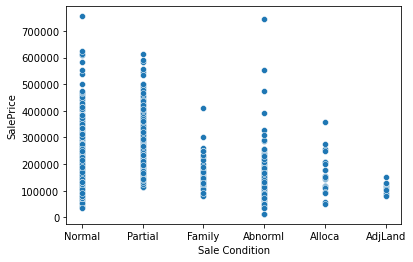

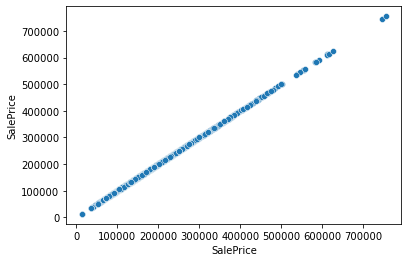

In [140]:
for col in ames.columns:
    sns.scatterplot(x=ames[col], y=ames['SalePrice'])
    plt.show()

It should be noted that the columns related to the information about Garage fall very close to the defined threshold of 5%. We can always come back and include these columns if they could help us build a better mode.

For now, I will delete all the columns with null values beyond that defined threshold

In [141]:
# Delete the columns containing NaNs higher that 5%
ames.dropna(thresh=ames.shape[0]*0.95, axis=1, inplace=True)
ames.shape

(2930, 69)

In [142]:
ames.describe()['SalePrice'].head()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
Name: SalePrice, dtype: float64

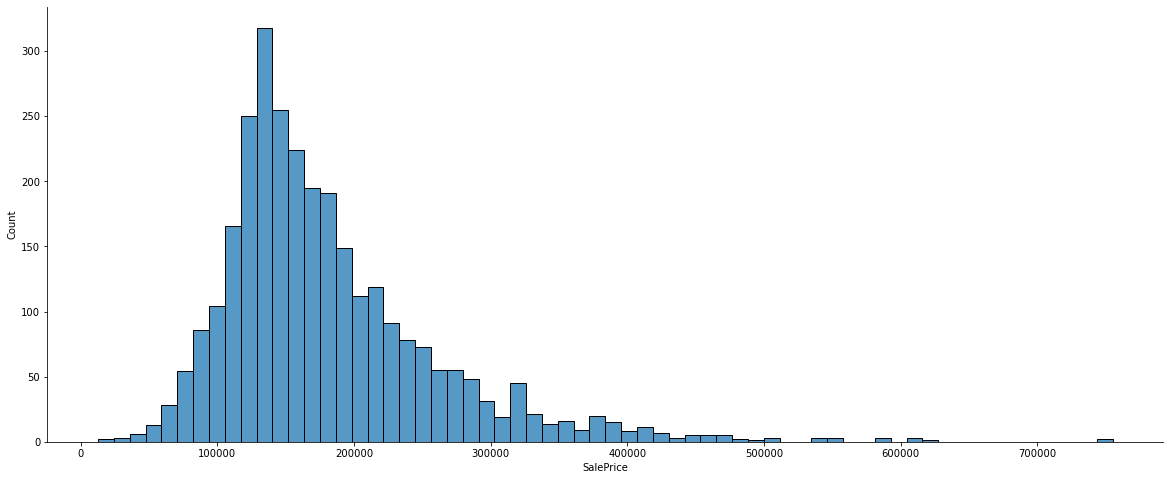

In [143]:
# plot
plt.figure(figsize=(20,8))    
sns.histplot(ames['SalePrice'])
sns.despine()

In [144]:
# Target's range
ames['SalePrice'].max() - ames['SalePrice'].min()

742211

In [145]:
# Check for the 'too obvious' Outliers
ames[ames['SalePrice'] > 700000]

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1760,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1.0,0.0,3,1,4,1,Ex,10,Typ,2,3.0,813.0,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000
1767,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0.0,1.0,3,1,4,1,Ex,10,Typ,2,3.0,832.0,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000


- These entries look realistic at first glace. Though they could dent the performace of the model, lets maintain them

## Setting up a Pipeline of functions
Functions that transform features, select features and train-and-test features
![pipeline](my_pipeline.PNG)

## Baseline 


In [146]:
# For now, just return DataFrame
def transform_features(data):
    '''
    under developement
    '''
    df = data.copy()
    return df

In [147]:
# For now, it just returns the DataFrame's two columns
def select_features(df):
    '''
    under developement
    '''
    return df[['Gr Liv Area', 'SalePrice']]

In [148]:
def train_and_test(data):
    '''
    under developement
    '''
    train = data.iloc[:1460]
    test = data.iloc[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    target = 'SalePrice'
    features = numeric_train.columns.drop(target)
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    
    predictions = lr.predict(test[features])
    
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    r2 = r2_score(test[target], predictions)
    
    return rmse, r2

In [149]:
# Features Transformation
round1_transformed_data = transform_features(ames)

# Features Selection
round1_selected_data = select_features(round1_transformed_data)

# Training and Testing
round1_rmse_data = train_and_test(round1_selected_data)

print('So in this first and lazy attempt, we have got\nRMSE of {}\nR2 of {}'.format(round1_rmse_data[0],
                                                                                        round1_rmse_data[1]))

So in this first and lazy attempt, we have got
RMSE of 57088.25161263909
R2 of 0.5073530501149299


---

## Data Cleaning

#### Checking whether any column contains single value, hence offering zero or near-zero variance

In [150]:
# DataFrame it due to large number of columns
dict_uniqueness = {}
for col in ames.columns:
    num = ames[col].nunique()
    percentage = float(num) / ames.shape[0] * 100
    null_vals = ames[col].isnull().sum()
    dict_uniqueness[col] = [num, percentage, null_vals]
df_dict_uniqueness = pd.DataFrame(dict_uniqueness).T.rename(columns={0:'num_unique', 
                                                                     1:'pct_unique', 
                                                                     2:'num_null_values'})

# Sort by the lowest num_unique
df_dict_uniqueness.sort_values(by='num_unique')

,num_unique,pct_unique,num_null_values
Central Air,2.0,0.068259,0.0
Street,2.0,0.068259,0.0
Paved Drive,3.0,0.102389,0.0
Land Slope,3.0,0.102389,0.0
Utilities,3.0,0.102389,0.0
Bsmt Half Bath,3.0,0.102389,2.0
Half Bath,3.0,0.102389,0.0
Lot Shape,4.0,0.136519,0.0
Kitchen AbvGr,4.0,0.136519,0.0
Bsmt Exposure,4.0,0.136519,83.0


In [151]:
# sort by the lowest pct
df_dict_uniqueness.sort_values(by='pct_unique')

,num_unique,pct_unique,num_null_values
Central Air,2.0,0.068259,0.0
Street,2.0,0.068259,0.0
Paved Drive,3.0,0.102389,0.0
Land Slope,3.0,0.102389,0.0
Utilities,3.0,0.102389,0.0
Bsmt Half Bath,3.0,0.102389,2.0
Half Bath,3.0,0.102389,0.0
Lot Shape,4.0,0.136519,0.0
Kitchen AbvGr,4.0,0.136519,0.0
Bsmt Exposure,4.0,0.136519,83.0


In [152]:
# Consideration of the columns which contain less than 1% Unique Values
df_dict_uniqueness.loc[df_dict_uniqueness.sort_values(by='pct_unique')['pct_unique'] <= 1].index

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Cars', 'Paved Drive', 'Pool Area', 'Mo Sold', 'Yr Sold',
       'Sale Type', 'Sale Condition'],
      dtype='object')

- After some manual investigation, it came out that most of these columns are nominal or ordinal variables. 

Lets provide the ordinal variables with ordinal encoding. I chose to do it manually, as it helped me understand the data at feature level

- From the columns of Object Dtypes, the ordinal columns shall be mapped to numbers.
- Whereas all the remaining columns shall be considered as nominal and will be treated with One Hot Encoding.

In [153]:
LotShape_mapping = {'Reg':4, 'IR1':3, 'IR2':2, 'IR1':1}
ames['Lot Shape'] = ames['Lot Shape'].map(LotShape_mapping, na_action='ignore')

Utilities_mapping = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
ames['Utilities'] = ames['Utilities'].map(Utilities_mapping, na_action='ignore')

LandSlope_mapping = {'Gtl':3, 'Mod':2, 'Sev':1}
ames['Land Slope'] = ames['Land Slope'].map(LandSlope_mapping, na_action='ignore')

ExterQual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ames['Exter Qual'] = ames['Exter Qual'].map(ExterQual_mapping, na_action='ignore')

ExterCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ames['Exter Cond'] = ames['Exter Cond'].map(ExterCond_mapping, na_action='ignore')

BsmtQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
ames['Bsmt Qual'] = ames['Bsmt Qual'].map(BsmtQual_mapping, na_action='ignore')

BsmtCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
ames['Bsmt Cond'] = ames['Bsmt Cond'].map(BsmtCond_mapping, na_action='ignore')

BsmtExposure_mapping = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].map(BsmtExposure_mapping, na_action='ignore')

BsmtFin_mapping = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
ames['BsmtFin Type 1'] = ames['BsmtFin Type 1'].map(BsmtFin_mapping, na_action='ignore')

Functional_mapping = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1 }
ames['Functional'] = ames['Functional'].map(Functional_mapping, na_action='ignore')

HeatingQC_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ames['Heating QC'] = ames['Heating QC'].map(HeatingQC_mapping, na_action='ignore')

CentralAir_mapping = {'Y': 1, 'N':0}
ames['Central Air'] = ames['Central Air'].map(CentralAir_mapping, na_action='ignore')

Electrical_mapping = {'SBrkr':5, 'FuseA':4, 'Mix':3, 'FuseF':2, 'FuseP':1 } # Assumed category 'Mix' to be at medium
ames['Electrical'] = ames['Electrical'].map(Electrical_mapping, na_action='ignore')

KitchenQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
ames['Kitchen Qual'] = ames['Kitchen Qual'].map(KitchenQual_mapping, na_action='ignore')

PavedDrive_mapping = {'Y':3, 'P':2, 'N':1}
ames['Paved Drive'] = ames['Paved Drive'].map(PavedDrive_mapping, na_action='ignore')

# FireplaceQu_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
# ames['Fireplace Qu'] = ames['Fireplace Qu'].map(FireplaceQu_mapping, na_action='ignore')

# GarageFinish_mapping = {'Fin':3, 'RFn':2, 'UnF':1, 'NA':0}
# ames['Garage Finish'] = ames['Garage Finish'].map(GarageFinish_mapping, na_action='ignore')

# GarageQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
# ames['Garage Qual'] = ames['Garage Qual'].map(GarageQual_mapping, na_action='ignore')

# GarageCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
# ames['Garage Cond'] = ames['Garage Cond'].map(GarageCond_mapping, na_action='ignore')

# PoolQC_mapping = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}
# ames['Pool QC'] = ames['Pool QC'].map(PoolQC_mapping, na_action='ignore')

# Fence_mapping = {'GdPrv': 4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
# ames['Fence'] = ames['Fence'].map(Fence_mapping, na_action='ignore')

#### The missing values and their treatment
Lets look into the columns that have an acceptable number of missing values i-e, below the threshold, and see what can be done to deal with these columns

In [154]:
ames_nulldf = ames.loc[:,ames.isnull().sum() > 0]
ames_nulldf.head()


,Lot Shape,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Electrical,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,1.0,Stone,112.0,3.0,4.0,4.0,4.0,639.0,Unf,0.0,441.0,1080.0,5.0,1.0,0.0,2.0,528.0
1,4.0,None,0.0,3.0,3.0,1.0,3.0,468.0,LwQ,144.0,270.0,882.0,5.0,0.0,0.0,1.0,730.0
2,1.0,BrkFace,108.0,3.0,3.0,1.0,5.0,923.0,Unf,0.0,406.0,1329.0,5.0,0.0,0.0,1.0,312.0
3,4.0,None,0.0,3.0,3.0,1.0,5.0,1065.0,Unf,0.0,1045.0,2110.0,5.0,1.0,0.0,2.0,522.0
4,1.0,None,0.0,4.0,3.0,1.0,6.0,791.0,Unf,0.0,137.0,928.0,5.0,0.0,0.0,2.0,482.0


The following columns comprise a few missing values each. A brief investigation helped to identify the columns as

|Feature|Type|Feature|Type|
|:-----|:--|:-----|:--|
|`Total Bsmt SF`|Continuous|`Bsmt Unf SF`|Continuous|
|`Mas Vnr Type`|Nominal|`Bsmt Half Bath`|Discrete|
|`Mas Vnr Area`|Continuous|`BsmtFin SF 1`,|Continuous|
|`Bsmt Qual`|Ordinal|`BsmtFin Type 2`|Ordinal|
|`Bsmt Cond`|Ordinal|`BsmtFin SF 2`|Continuous|
|`Bsmt Exposure`|Ordinal|`Electrical`|Ordinal|
|`BsmtFin Type 1`|Ordinal|`Garage Cars`|Discete|
|`Bsmt Full Bath`|Discrete|`Garage Area`|Continuous|


- Deletion of the all the Nominal columns with any Null Value
- Imputation with **Mean** for the Continuous Columns
- Imputation with **Mode** for the Discrete Columns
- Imputation with **Median** for the Ordinal Columns
                     

In [155]:
ames_nullcols = ames_nulldf.columns
ames_nullcols

Index(['Lot Shape', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [156]:
continuous_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
                   'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 
                   'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3-Ssn Porch', 'Screen Porch', 'Pool Area', 
                   'Misc Val', 'SalePrice']

discrete_cols = ['Order', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
                 'Half Bath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
                 'Mo Sold', 'Yr Sold']

ordinal_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
                'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'HeatingQC', 'Electrical', 
                'KitchenQual', 'Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
                'Pool QC', 'Fence']                


nominal_cols = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 
                'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
                'Sale Type', 'Sale Condition']

I will adopt a Selective approach to impute the missing values with the following
- Continuous variables are set to be imputed with the **Mean**
- Discrete Variables with the **Median**
- Ordinal Variables are imputed with the **Mode**

In [157]:
# Consider making a function imputer
nullcols_nominal = []
nullcols_continuous = []
nullcols_discrete = []
nullcols_ordinal = []
other = []
for col in ames_nullcols:
    if col in continuous_cols:
        nullcols_continuous.append(col)
    elif col in discrete_cols:
        nullcols_discrete.append(col)
    elif col in ordinal_cols: 
        nullcols_ordinal.append(col)
    elif col in nominal_cols:
        nullcols_nominal.append(col)
        

In [158]:
ames = ames.drop(nullcols_nominal, axis=1)

ames[[col for col in nullcols_continuous]] = ames[[col for col in nullcols_continuous]].fillna(ames[col].mean())

ames[[col for col in nullcols_discrete]] = ames[[col for col in nullcols_discrete]].fillna(ames[col].mode()[0])

ames[[col for col in nullcols_ordinal]] = ames[[col for col in nullcols_ordinal]].fillna(ames[col].median())


ames.isnull().sum().sum()

0

- All the null values have been imputed

### Lets look into the columns with 'Object' Dtypes

In [159]:
ames.select_dtypes(include=object)

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Foundation,BsmtFin Type 2,Heating,Sale Type,Sale Condition
0,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,CBlock,Unf,GasA,WD,Normal
1,RH,Pave,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,CBlock,LwQ,GasA,WD,Normal
2,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,CBlock,Unf,GasA,WD,Normal
3,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,CBlock,Unf,GasA,WD,Normal
4,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,Unf,GasA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,CBlock,Unf,GasA,WD,Normal
2926,RL,Pave,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,CBlock,ALQ,GasA,WD,Normal
2927,RL,Pave,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,PConc,Unf,GasA,WD,Normal
2928,RL,Pave,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,CBlock,LwQ,GasA,WD,Normal


In [160]:
ames.select_dtypes(exclude=object)

,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,31770,1.0,4,3,6,5,1960,1960,112.0,3,3,3.0,4.0,4.0,4.0,639.0,0.0,441.0,1080.0,2,1,5.0,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,8,2,2.0,528.0,2,210,62,0,0,0,0,0,5,2010,215000
1,20,11622,4.0,4,3,5,6,1961,1961,0.0,3,3,3.0,3.0,1.0,3.0,468.0,144.0,270.0,882.0,3,1,5.0,896,0,0,896,0.0,0.0,1,0,2,1,3,5,8,0,1.0,730.0,3,140,0,0,0,120,0,0,6,2010,105000
2,20,14267,1.0,4,3,6,6,1958,1958,108.0,3,3,3.0,3.0,1.0,5.0,923.0,0.0,406.0,1329.0,3,1,5.0,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,8,0,1.0,312.0,3,393,36,0,0,0,0,12500,6,2010,172000
3,20,11160,4.0,4,3,7,5,1968,1968,0.0,4,3,3.0,3.0,1.0,5.0,1065.0,0.0,1045.0,2110.0,5,1,5.0,2110,0,0,2110,1.0,0.0,2,1,3,1,5,8,8,2,2.0,522.0,3,0,0,0,0,0,0,0,4,2010,244000
4,60,13830,1.0,4,3,5,5,1997,1998,0.0,3,3,4.0,3.0,1.0,6.0,791.0,0.0,137.0,928.0,4,1,5.0,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,8,1,2.0,482.0,3,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,7937,1.0,4,3,6,6,1984,1984,0.0,3,3,3.0,3.0,3.0,6.0,819.0,0.0,184.0,1003.0,3,1,5.0,1003,0,0,1003,1.0,0.0,1,0,3,1,3,6,8,0,2.0,588.0,3,120,0,0,0,0,0,0,3,2006,142500
2926,20,8885,1.0,4,2,5,5,1983,1983,0.0,3,3,4.0,3.0,3.0,4.0,301.0,324.0,239.0,864.0,3,1,5.0,902,0,0,902,1.0,0.0,1,0,2,1,3,5,8,0,2.0,484.0,3,164,0,0,0,0,0,0,6,2006,131000
2927,85,10441,4.0,4,3,5,5,1992,1992,0.0,3,3,4.0,3.0,3.0,6.0,337.0,0.0,575.0,912.0,3,1,5.0,970,0,0,970,0.0,1.0,1,0,3,1,3,6,8,0,0.0,0.0,3,80,32,0,0,0,0,700,7,2006,132000
2928,20,10010,4.0,4,2,5,5,1974,1975,0.0,3,3,4.0,3.0,3.0,5.0,1071.0,123.0,195.0,1389.0,4,1,5.0,1389,0,0,1389,1.0,0.0,1,0,2,1,3,6,8,1,2.0,418.0,3,240,38,0,0,0,0,0,4,2006,170000


By looking closely at numerical features, three of them should catch our attention. The features are `Year Built`, `Year Remod/Add` and `Yr Sold`.
`Year Built` is about the year property was built. `Year Remod/Add` tells us about last modification if there is any. Whereas `Yr Sold` tells us about the year of sale of the property. 
There features might become far more impactful if we combine them to calculate "Age of house", and "Years since alteration"

Lets do it for now by creating a new features
- `age` that will be formed by subtracting `Year Built` from `Yr Sold` and 
- `years_remod` that will be formed by subtracting `Year Remod/Add` from `Yr Sold`

In [161]:
discrete_cols

['Order',
 'Year Built',
 'Year Remod/Add',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom',
 'Kitchen',
 'TotRmsAbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold']

In [162]:
len(discrete_cols)

15

In [163]:
ames['age'] = ames['Yr Sold'] - ames['Year Built'] 

ames['years_remod'] = ames['Yr Sold'] - ames['Year Remod/Add']  

# To maintain the columns' types list, lets append both new columns
if ('age' or 'years_remod') not in discrete_cols:
    discrete_cols.append('age')
    discrete_cols.append('years_remod')


In [164]:
# After having made new columns from, the following columns are not required
ames = ames.drop(['Yr Sold', 'Year Built', 'Year Remod/Add'], axis=1)

The following Columns can potentially Leak Data to our target variable `SalePrice`:
    
`Mo Sold`, `Sale Condition`, `Sale Type`, `Yr Sold`. For more information, check out [Data Documentation](DataDocumentation.txt)

In [165]:
ames = ames.drop(['Sale Type', 'Sale Condition', 'Mo Sold'], axis=1) # 'Yr Sold' has already been removed

We rarely get to have a perfect data!
On running **value_counts() on both of our new columns, we found out some samples with negative values.**

In [166]:
# capture these rows
del_us = ames[(ames['age'] < 0) | (ames['years_remod'] < 0)]
del_us

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,age,years_remod
1702,60,RL,16659,Pave,1.0,Lvl,4,Corner,3,NridgHt,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,0.0,4,3,PConc,4.0,3.0,1.0,1.0,0.0,Unf,0.0,1582.0,1582.0,GasA,5,1,5.0,1582,570,0,2152,0.0,0.0,2,1,3,1,4,7,8,1,2.0,728.0,3,0,368,0,0,0,0,0,260116,0,-1
2180,20,RL,39290,Pave,1.0,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,1224.0,5,3,PConc,5.0,3.0,4.0,6.0,4010.0,Unf,0.0,1085.0,5095.0,GasA,5,1,5.0,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,8,2,3.0,1154.0,3,546,484,0,0,0,0,17000,183850,-1,-2
2181,60,RL,40094,Pave,1.0,Bnk,4,Inside,3,Edwards,PosN,PosN,1Fam,2Story,10,5,Hip,CompShg,CemntBd,CmentBd,762.0,5,3,PConc,5.0,3.0,4.0,6.0,2260.0,Unf,0.0,878.0,3138.0,GasA,5,1,5.0,3138,1538,0,4676,1.0,0.0,3,1,3,1,5,11,8,1,3.0,884.0,3,208,406,0,0,0,0,0,184750,0,-1


In [167]:
# Lets remove these rows.
ames = ames.drop(del_us.index, axis=0).reset_index()

---

## Feature Engineering
Beginning with Feature Selection and attempt to fulfill the assumptions of Linear model as much as possible

<AxesSubplot:>

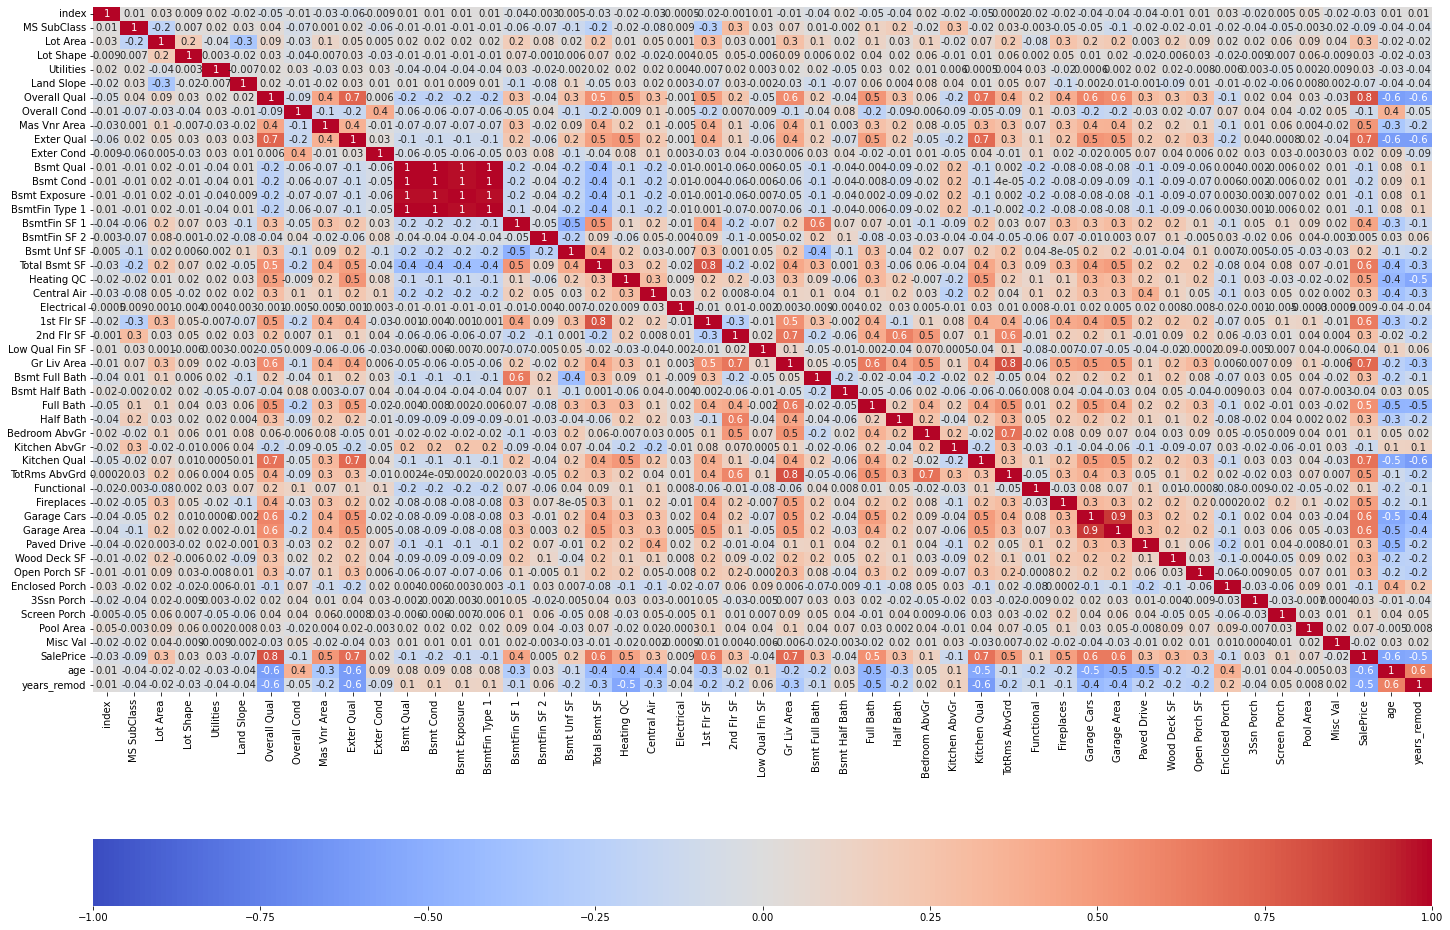

In [168]:
# Lets Plot a Correlation Matrix
numeric_df = ames.select_dtypes(['integer', 'float'])

plt.figure(figsize=(24,18))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, 
             cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})

- Its hard to see the pairs in this congested Heatmap. However it can be viewed clearly if opened separately in the browser.

To help ourself, lets first find all the columns that have > 0.7 of the Correlation

In [169]:
# Taking the absolute value to address negative figures as well
df_corr = numeric_df.corr().abs()

# Adding condition df_corr < 1.00 to avoid same columns overlapping 
check_c = df_corr[(df_corr >= 0.7) & (df_corr < 1.00)] 
cols_c = check_c.dropna(how='all', axis=1).columns 

print('Following columns are collinear with other columns\n{}.\n\nTo find pairs, Kindly consult the heatmap shown above'.format(cols_c))


Following columns are collinear with other columns
Index(['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Kitchen Qual', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area',
       'SalePrice'],
      dtype='object').

To find pairs, Kindly consult the heatmap shown above


Text(0.5, 1.0, 'COLLINEARITY CHECK!\nCorrelations that are greater either greater than 0.7\nOr Less than -0.7')

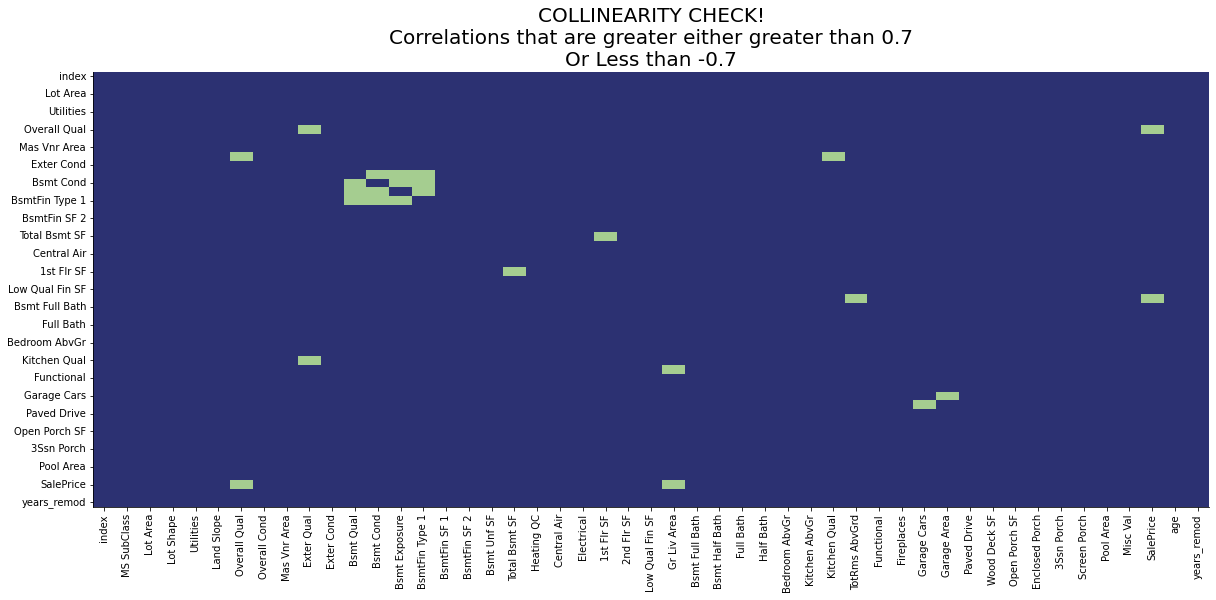

In [170]:
# check_c shows only the ABSOLUTE Correlations greater than 0.7 and less than 1.00
plt.figure(figsize=(20,8))    
sns.heatmap(check_c.isnull(), cbar=False, cmap='crest')
sns.despine()
plt.title('COLLINEARITY CHECK!\nCorrelations that are greater either greater than 0.7\nOr Less than -0.7', fontsize=20)

- This shows that there is definitely a need to remove these highly correlated columns.

In [171]:
pair_highcorr = pd.DataFrame(numeric_df.corr().abs().unstack().sort_values(ascending=False))
# Only take pairs with corr higher than 0.7 and to avoid duplicates, set upper limit = 1.00
pairs = pair_highcorr[(pair_highcorr[0] > 0.7) & (pair_highcorr[0] < 1.0)]
# drop rows containing target from each level of index
pairs = pairs.drop('SalePrice', level=0, axis=0)
pairs = pairs.drop('SalePrice', level=1, axis=0)

In [172]:
pairs

0
Bsmt Qual      Bsmt Cond       0.999960
Bsmt Cond      Bsmt Qual       0.999960
Bsmt Qual      BsmtFin Type 1  0.999695
BsmtFin Type 1 Bsmt Qual       0.999695
               Bsmt Cond       0.999667
Bsmt Cond      BsmtFin Type 1  0.999667
Bsmt Qual      Bsmt Exposure   0.981198
Bsmt Exposure  Bsmt Qual       0.981198
Bsmt Cond      Bsmt Exposure   0.981158
Bsmt Exposure  Bsmt Cond       0.981158
               BsmtFin Type 1  0.980724
BsmtFin Type 1 Bsmt Exposure   0.980724
Garage Cars    Garage Area     0.889027
Garage Area    Garage Cars     0.889027
TotRms AbvGrd  Gr Liv Area     0.806092
Gr Liv Area    TotRms AbvGrd   0.806092
Total Bsmt SF  1st Flr SF      0.792528
1st Flr SF     Total Bsmt SF   0.792528
Overall Qual   Exter Qual      0.732807
Exter Qual     Overall Qual    0.732807
               Kitchen Qual    0.714582
Kitchen Qual   Exter Qual      0.714582

In [173]:
list_pairs = pairs.index.tolist()

In [174]:
# Remove duplicated tuples
res = list(unique_everseen(list_pairs, key=frozenset))
res

[('Bsmt Qual', 'Bsmt Cond'),
 ('Bsmt Qual', 'BsmtFin Type 1'),
 ('BsmtFin Type 1', 'Bsmt Cond'),
 ('Bsmt Qual', 'Bsmt Exposure'),
 ('Bsmt Cond', 'Bsmt Exposure'),
 ('Bsmt Exposure', 'BsmtFin Type 1'),
 ('Garage Cars', 'Garage Area'),
 ('TotRms AbvGrd', 'Gr Liv Area'),
 ('Total Bsmt SF', '1st Flr SF'),
 ('Overall Qual', 'Exter Qual'),
 ('Exter Qual', 'Kitchen Qual')]

In [175]:
corr_to_target = numeric_df[cols_c].corr().abs()['SalePrice'].sort_values(ascending=False)
corr_to_target

SalePrice         1.000000
Overall Qual      0.801206
Gr Liv Area       0.717596
Exter Qual        0.699605
Kitchen Qual      0.673934
Garage Cars       0.648111
Total Bsmt SF     0.643988
Garage Area       0.641675
1st Flr SF        0.635185
TotRms AbvGrd     0.498574
Bsmt Cond         0.153744
Bsmt Qual         0.148414
BsmtFin Type 1    0.146273
Bsmt Exposure     0.144373
Name: SalePrice, dtype: float64

In [176]:
remove_cols = []
keep_cols = []
for pair in res:
    col1 = pair[0]
    col2 = pair[1]
    if corr_to_target[col1] > corr_to_target[col2]:
        remove_cols.append(col2)
        keep_cols.append(col1)
    else:
        remove_cols.append(col1)
        keep_cols.append(col2)


In [177]:
remove_cols = set(remove_cols)

In [178]:
remove_cols

{'1st Flr SF',
 'Bsmt Exposure',
 'Bsmt Qual',
 'BsmtFin Type 1',
 'Exter Qual',
 'Garage Area',
 'Kitchen Qual',
 'TotRms AbvGrd'}

In [179]:
# remove from the main df
ames = ames.drop(remove_cols, axis=1)
# remove from the numeric sub-df
numeric_df = numeric_df.drop(remove_cols, axis=1)

In [180]:
numeric_df

,index,MS SubClass,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Cond,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Functional,Fireplaces,Garage Cars,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,age,years_remod
0,0,20,31770,1.0,4,3,6,5,112.0,3,4.0,639.0,0.0,441.0,1080.0,2,1,5.0,0,0,1656,1.0,0.0,1,0,3,1,8,2,2.0,2,210,62,0,0,0,0,0,215000,50,50
1,1,20,11622,4.0,4,3,5,6,0.0,3,3.0,468.0,144.0,270.0,882.0,3,1,5.0,0,0,896,0.0,0.0,1,0,2,1,8,0,1.0,3,140,0,0,0,120,0,0,105000,49,49
2,2,20,14267,1.0,4,3,6,6,108.0,3,3.0,923.0,0.0,406.0,1329.0,3,1,5.0,0,0,1329,0.0,0.0,1,1,3,1,8,0,1.0,3,393,36,0,0,0,0,12500,172000,52,52
3,3,20,11160,4.0,4,3,7,5,0.0,3,3.0,1065.0,0.0,1045.0,2110.0,5,1,5.0,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,3,0,0,0,0,0,0,0,244000,42,42
4,4,60,13830,1.0,4,3,5,5,0.0,3,3.0,791.0,0.0,137.0,928.0,4,1,5.0,701,0,1629,0.0,0.0,2,1,3,1,8,1,2.0,3,212,34,0,0,0,0,0,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2925,80,7937,1.0,4,3,6,6,0.0,3,3.0,819.0,0.0,184.0,1003.0,3,1,5.0,0,0,1003,1.0,0.0,1,0,3,1,8,0,2.0,3,120,0,0,0,0,0,0,142500,22,22
2923,2926,20,8885,1.0,4,2,5,5,0.0,3,3.0,301.0,324.0,239.0,864.0,3,1,5.0,0,0,902,1.0,0.0,1,0,2,1,8,0,2.0,3,164,0,0,0,0,0,0,131000,23,23
2924,2927,85,10441,4.0,4,3,5,5,0.0,3,3.0,337.0,0.0,575.0,912.0,3,1,5.0,0,0,970,0.0,1.0,1,0,3,1,8,0,0.0,3,80,32,0,0,0,0,700,132000,14,14
2925,2928,20,10010,4.0,4,2,5,5,0.0,3,3.0,1071.0,123.0,195.0,1389.0,4,1,5.0,0,0,1389,1.0,0.0,1,0,2,1,8,1,2.0,3,240,38,0,0,0,0,0,170000,32,31


Next, lets check MultiCollinearity among the features. This will be an exhaustive process. The priority shall be to retain the strongest predictors as much as possible. Here is the list of the predictors that were found by checking the correlation against the target, `SalePrice`

- `Overall Qual` 
- `Gr Liv Area`       
- `Exter Qual`         
- `1st Flr SF`        
- `Full Bath`          
- `Fireplaces`        
- `Heating QC`

In [181]:
numeric_df.corr().abs()['SalePrice'].sort_values(ascending=False)[:10]

SalePrice        1.000000
Overall Qual     0.801206
Gr Liv Area      0.717596
Garage Cars      0.648111
Total Bsmt SF    0.643988
age              0.558979
Full Bath        0.546118
years_remod      0.534985
Mas Vnr Area     0.512712
Fireplaces       0.474831
Name: SalePrice, dtype: float64

In [182]:
# the independent variables set
X = ames.select_dtypes(exclude=object).drop('SalePrice', axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,index,4.098754
1,MS SubClass,4.146935
2,Lot Area,3.817302
3,Lot Shape,1.101885
4,Utilities,476.631786
5,Land Slope,165.172257
6,Overall Qual,64.574235
7,Overall Cond,48.766030
8,Mas Vnr Area,1.874119
9,Exter Cond,86.711746


In [183]:
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
14,Total Bsmt SF,4422.317064
13,Bsmt Unf SF,1695.293007
11,BsmtFin SF 1,1332.421136
4,Utilities,476.631786
27,Functional,167.130042
5,Land Slope,165.172257
12,BsmtFin SF 2,104.740515
20,Gr Liv Area,100.938340
9,Exter Cond,86.711746
6,Overall Qual,64.574235


On an initial check, it is found that there is very high multicollinearity present among the features. And many of the strong predictors are showing high VIF values. 
- To address this, I will try to get rid of the weaker predictors first. And see if removing the weak predictors cause the VIF of strong predictors to decrease. 
- Another possible approach could be to take out one variable are calculate the VIF again.

For now, I'd adopt the first approach

**Loosely speaking, the following features could be taken as 'weaker' predictors**

In [184]:
numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)[12:]

Wood Deck SF       0.328183
Open Porch SF      0.316262
Half Bath          0.284871
Bsmt Full Bath     0.276258
Paved Drive        0.275909
2nd Flr SF         0.269601
Lot Area           0.267520
Central Air        0.264462
Bsmt Unf SF        0.182332
Bsmt Cond          0.153744
Bedroom AbvGr      0.143916
Enclosed Porch     0.128685
Functional         0.121769
Kitchen AbvGr      0.119760
Screen Porch       0.112280
Overall Cond       0.101540
MS SubClass        0.085128
Pool Area          0.068438
Land Slope         0.066488
Low Qual Fin SF    0.037629
Bsmt Half Bath     0.035875
3Ssn Porch         0.032268
index              0.031542
Lot Shape          0.026444
Utilities          0.026025
Exter Cond         0.021902
Misc Val           0.019273
Electrical         0.009277
BsmtFin SF 2       0.004906
Name: SalePrice, dtype: float64

In [185]:
def vif_treatment(df, drop_target, drop_cols=None):
    '''
    The function helps calculating the VIF
    of the features
    
    Args:
        df: The DataFrame
        drop_cols: list of columns to be
                   removed. By default, 
                   None.
    Returns:
        prints vif_data. If drop_cols is
        given, then it shows the VIF of 
        the features after the deletion 
        of the mentioned columns
    '''
    X = df.drop(drop_target, axis=1)
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns

    # calculating VIF for each feature
    vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
    #return vif_data.sort_values(by='VIF', ascending=False)
    #return vif_data # print(vif_data)
    if drop_cols != None:
        X = X.drop(drop_cols, axis=1)
            # VIF dataframe
        after_removal_vif_data = pd.DataFrame()
        after_removal_vif_data['feature'] = X.columns

        # calculating VIF for each feature
        after_removal_vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                                  for i in range(len(X.columns))]
        after_removal_vif_data = after_removal_vif_data.sort_values(by='VIF', ascending=False)
        # print('\nWithout the mentioned the features\n\n', vif_data1)
        return vif_data,'-'*34, after_removal_vif_data, after_removal_vif_data['feature'].tolist()

In [186]:
vif_treatment(numeric_df,'SalePrice', drop_cols=None)

In [187]:
weak_predictors = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)[12:].index.tolist()

In [188]:
vif_treatment(numeric_df,'SalePrice', weak_predictors)[3]

['Overall Qual',
 'Gr Liv Area',
 'Heating QC',
 'Full Bath',
 'Total Bsmt SF',
 'Garage Cars',
 'age',
 'years_remod',
 'BsmtFin SF 1',
 'Fireplaces',
 'Mas Vnr Area']

In [189]:
numerical_cols_after_vif = vif_treatment(numeric_df,'SalePrice', weak_predictors)[3]

- The VIF has been significantly reduced. However, these are still very high VIFs. The aim is to have no feature beyond a VIF of 10

P.S. Working through removing the features through VIF technique doesn't look well as it is costing a lot of data loss. The PCA approach might be better than it

In [190]:
numeric_df = numeric_df[numerical_cols_after_vif]
numeric_df.head()

,Overall Qual,Gr Liv Area,Heating QC,Full Bath,Total Bsmt SF,Garage Cars,age,years_remod,BsmtFin SF 1,Fireplaces,Mas Vnr Area
0,6,1656,2,1,1080.0,2.0,50,50,639.0,2,112.0
1,5,896,3,1,882.0,1.0,49,49,468.0,0,0.0
2,6,1329,3,1,1329.0,1.0,52,52,923.0,0,108.0
3,7,2110,5,2,2110.0,2.0,42,42,1065.0,2,0.0
4,5,1629,4,2,928.0,2.0,13,12,791.0,1,0.0


#### Checking if the transformation is required

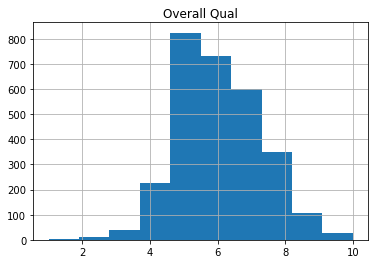

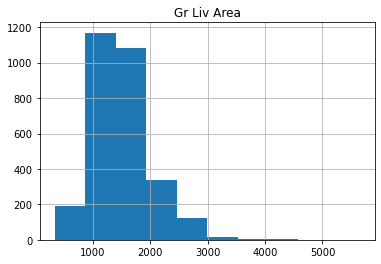

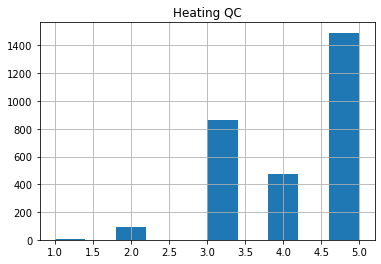

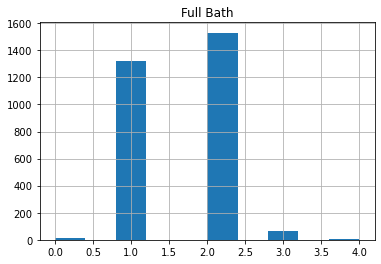

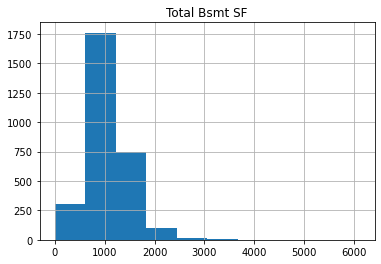

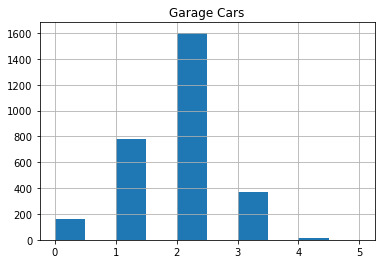

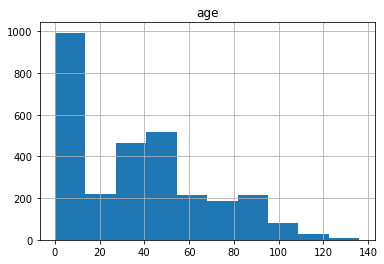

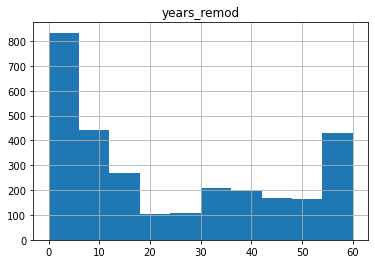

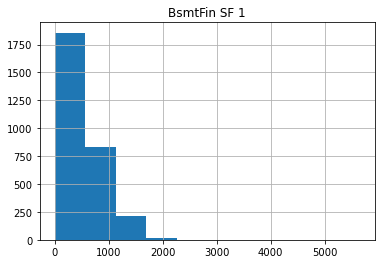

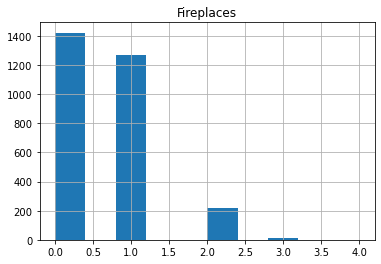

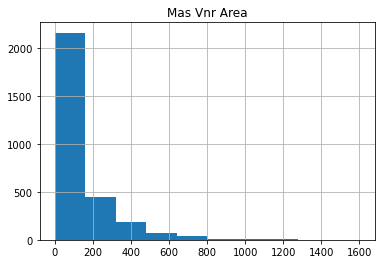

In [191]:
for col in numeric_df.columns:
    plt.figure()
    numeric_df[col].hist()
    plt.title(col)

- It doesn't look like that proceeding without transformation would be a nice idea. 

To further corroborate it, lets do a quick normal test.

In [192]:
cols_to_transform = list()
alpha = 0.05
for col in numeric_df.columns:
    stat, p = stats.normaltest(numeric_df[col])
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        cols_to_transform.append(col)
        print('Sample does not look Gaussian (reject H0)')
    print('\n')

Overall Qual
Statistics=16.574, p=0.000
Sample does not look Gaussian (reject H0)


Gr Liv Area
Statistics=637.214, p=0.000
Sample does not look Gaussian (reject H0)


Heating QC
Statistics=1843.817, p=0.000
Sample does not look Gaussian (reject H0)


Full Bath
Statistics=84.968, p=0.000
Sample does not look Gaussian (reject H0)


Total Bsmt SF
Statistics=735.382, p=0.000
Sample does not look Gaussian (reject H0)


Garage Cars
Statistics=29.511, p=0.000
Sample does not look Gaussian (reject H0)


age
Statistics=206.315, p=0.000
Sample does not look Gaussian (reject H0)


years_remod
Statistics=32124.313, p=0.000
Sample does not look Gaussian (reject H0)


BsmtFin SF 1
Statistics=877.509, p=0.000
Sample does not look Gaussian (reject H0)


Fireplaces
Statistics=218.170, p=0.000
Sample does not look Gaussian (reject H0)


Mas Vnr Area
Statistics=1571.377, p=0.000
Sample does not look Gaussian (reject H0)




In [193]:
numeric_df[cols_to_transform].min()

Overall Qual       1.0
Gr Liv Area      334.0
Heating QC         1.0
Full Bath          0.0
Total Bsmt SF      0.0
Garage Cars        0.0
age                0.0
years_remod        0.0
BsmtFin SF 1       0.0
Fireplaces         0.0
Mas Vnr Area       0.0
dtype: float64

- There is a definite need for Transformation

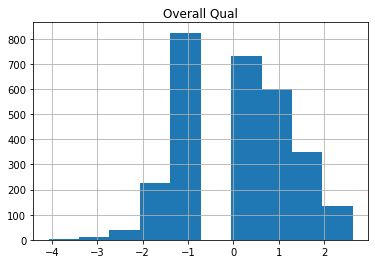

Overall Qual
Statistics=4.326, p=0.115
Sample looks Gaussian (fail to reject H0)


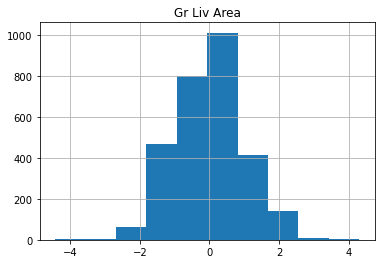

Gr Liv Area
Statistics=2.001, p=0.368
Sample looks Gaussian (fail to reject H0)


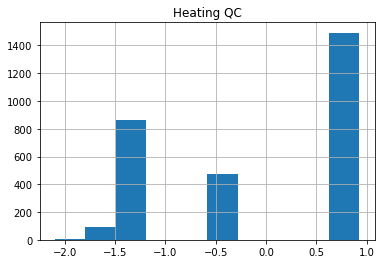

Heating QC
Statistics=14382.114, p=0.000
Sample does not look Gaussian (reject H0)


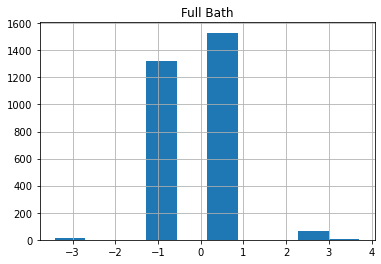

Full Bath
Statistics=249.439, p=0.000
Sample does not look Gaussian (reject H0)


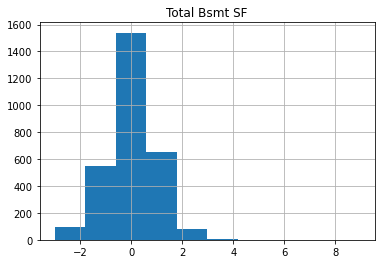

Total Bsmt SF
Statistics=243.982, p=0.000
Sample does not look Gaussian (reject H0)


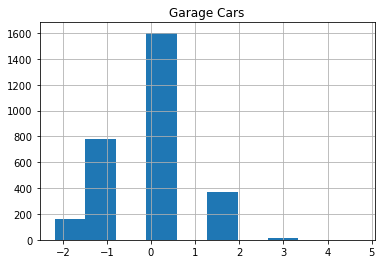

Garage Cars
Statistics=6.747, p=0.034
Sample does not look Gaussian (reject H0)


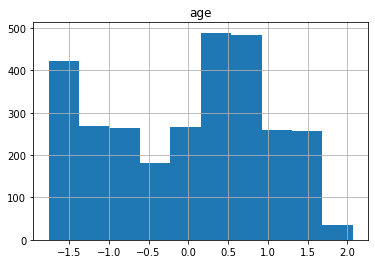

age
Statistics=1488.125, p=0.000
Sample does not look Gaussian (reject H0)


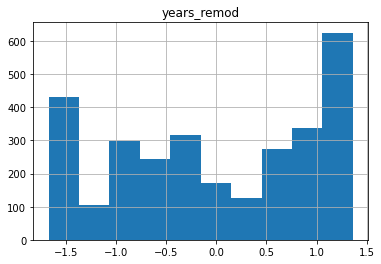

years_remod
Statistics=20689.377, p=0.000
Sample does not look Gaussian (reject H0)


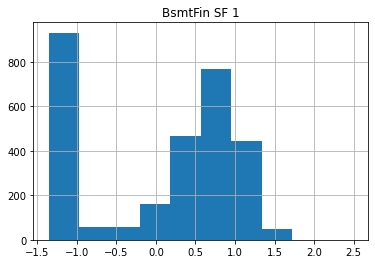

BsmtFin SF 1
Statistics=19004.744, p=0.000
Sample does not look Gaussian (reject H0)


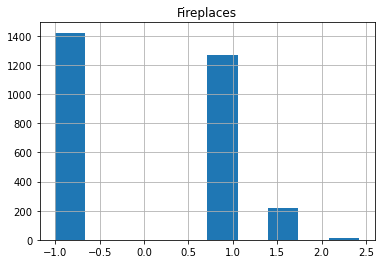

Fireplaces
Statistics=13155.169, p=0.000
Sample does not look Gaussian (reject H0)


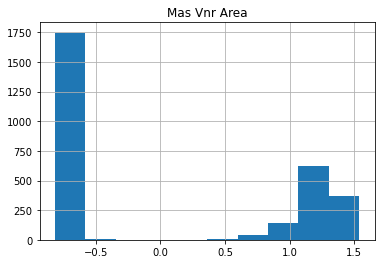

Mas Vnr Area
Statistics=12219.511, p=0.000
Sample does not look Gaussian (reject H0)


In [194]:
pt = PowerTransformer(method='yeo-johnson')
for col in numeric_df[cols_to_transform]:
    col_transformed = pt.fit_transform(numeric_df[cols_to_transform][[col]])
    pd.DataFrame(col_transformed)[0].hist()
    plt.title(col)
    plt.show()
    stat, p = stats.normaltest(col_transformed)
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [195]:
cols_to_transform = list()
pt = PowerTransformer(method='yeo-johnson')
alpha = 0.05
for col in numeric_df.columns:
    stat, p = stats.normaltest(numeric_df[col])
    if p > alpha:
        pass
    else:
        cols_to_transform.append(col)
for col in numeric_df[cols_to_transform]:
    col_transformed = pt.fit_transform(numeric_df[cols_to_transform][[col]])
    numeric_df.loc[:,col] = col_transformed

In [196]:
numeric_df

,Overall Qual,Gr Liv Area,Heating QC,Full Bath,Total Bsmt SF,Garage Cars,age,years_remod,BsmtFin SF 1,Fireplaces,Mas Vnr Area
0,-0.040168,0.471921,-1.784939,-1.027449,0.122898,0.283382,0.633366,1.140923,0.739773,1.623260,1.119499
1,-0.764290,-1.425219,-1.219179,-1.027449,-0.330618,-1.018517,0.609856,1.117058,0.553524,-1.003991,-0.815793
2,-0.040168,-0.209343,-1.219179,-1.027449,0.667237,-1.018517,0.679556,1.187680,0.977531,-1.003991,1.111688
3,0.658771,1.224584,0.927286,0.805391,2.244868,0.283382,0.436659,0.939789,1.075610,1.623260,-0.815793
4,-0.764290,0.420942,-0.335368,0.805391,-0.223354,0.283382,-0.575752,-0.219220,0.875299,0.819912,-0.815793
...,...,...,...,...,...,...,...,...,...,...,...
2922,-0.040168,-1.077973,-1.219179,-1.027449,-0.051014,0.283382,-0.182027,0.282922,0.898027,-1.003991,-0.815793
2923,-0.764290,-1.404691,-1.219179,-1.027449,-0.372935,0.283382,-0.144577,0.323869,0.311421,-1.003991,-0.815793
2924,-0.764290,-1.181008,-1.219179,-1.027449,-0.260523,-2.179269,-0.525502,-0.101086,0.371066,-1.003991,-0.815793
2925,-0.764290,-0.072751,-0.335368,-1.027449,0.794791,0.283382,0.156352,0.614518,1.079526,0.819912,-0.815793


- After having the columns transformed, lets move on to Scaling and finally, Principal Components Analysis

In [197]:
scaler = StandardScaler()
numeric_df = scaler.fit_transform(numeric_df)

In [198]:
pca = PCA(n_components=0.9995)
numeric_df_pca = pd.DataFrame(pca.fit_transform(numeric_df))
numeric_df_pca

,0,1,2,3,4,5,6,7,8,9,10
0,-0.442202,2.746390,0.857049,0.602413,0.914279,0.794016,0.122011,-0.299713,0.333815,0.240643,0.351719
1,-2.838314,0.576904,-0.849891,0.021390,-0.631675,0.286229,0.014344,-0.286038,0.084115,-0.470121,0.033252
2,-1.400817,1.806740,-0.843185,1.162254,-0.433819,-0.706516,0.655159,-0.261315,0.765876,-0.177871,0.224471
3,1.724400,1.922398,0.925420,-1.911701,-0.794352,-0.855184,0.716196,0.507807,-0.678626,-0.555062,-0.105832
4,0.375719,0.351911,0.436695,-0.725920,-0.550265,0.408334,-1.259201,-0.352136,-0.784436,0.352209,0.484712
...,...,...,...,...,...,...,...,...,...,...,...
2922,-1.324763,0.476056,-1.230809,0.006850,-0.966692,1.292842,-0.085860,-0.040215,0.464424,-0.209706,0.102915
2923,-1.888002,0.012015,-1.064343,0.231818,-0.668326,1.402646,-0.096751,0.046821,-0.096335,-0.001576,0.169855
2924,-2.347462,-0.255286,-1.374259,-0.187134,-0.515851,-0.089979,0.013291,-1.738814,0.188822,-0.089227,0.771242
2925,-0.589219,1.542685,-0.312791,-1.164472,-0.198505,0.588113,0.187899,0.334329,-0.495630,0.336224,0.550305


In [199]:
print(pca.explained_variance_ratio_.sum())

0.9999999999999999


### Moving on to Categorical Columns 
All nominal variables are the candidates of being converted to Categorical Dtype. Let's check the nominal variables for
- Unique values in them. We have to be vary of columns that contain too many unique values
- Columns that have an overwhelming percentage of a certain value. They are akin to low-variance numerical feature (no variability in the data for model to capture). For example if a column has a few unique values but more than 95% of the values belong to a specific category.

We also have to look into columns that are currently in numerical encoding but could do much better with Categorical encoding 


In [200]:
nominal_features_all = [ 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 
                     'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                     'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
                     'Misc Feature', 'Sale Type', 'Sale Condition']

In [201]:
text_df = ames.select_dtypes(include=object)
text_df

,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Foundation,BsmtFin Type 2,Heating
0,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,CBlock,Unf,GasA
1,RH,Pave,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,CBlock,LwQ,GasA
2,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,CBlock,Unf,GasA
3,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,CBlock,Unf,GasA
4,RL,Pave,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,Unf,GasA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,RL,Pave,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,CBlock,Unf,GasA
2923,RL,Pave,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,CBlock,ALQ,GasA
2924,RL,Pave,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,PConc,Unf,GasA
2925,RL,Pave,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,CBlock,LwQ,GasA


Checking how the values are distributed within each nominal feature

In [202]:
# Lets check the frequency tables with value_counts
for col in text_df.columns:
    print(col,'\n',text_df[col].value_counts(), '\n', 'NUNIQUE:',
         text_df[col].nunique(), '\n', '-'*20)

MS Zoning 
 RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64 
 NUNIQUE: 7 
 --------------------
Street 
 Pave    2915
Grvl      12
Name: Street, dtype: int64 
 NUNIQUE: 2 
 --------------------
Land Contour 
 Lvl    2632
HLS     120
Bnk     115
Low      60
Name: Land Contour, dtype: int64 
 NUNIQUE: 4 
 --------------------
Lot Config 
 Inside     2138
Corner      510
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64 
 NUNIQUE: 5 
 --------------------
Neighborhood 
 NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    165
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2


- Columns namely `Heating`, `Roof Matl`, `Condition 2`, `Land Contour`, `Street`, `Central Air` have one value each that has an overwhelming presence.
- Columns `Exterior 1st`, `Exterior 2nd` and `Neighborhood` contain relatively larger number of unique values.
    - We should decide among either to take them all, leave them all or define a threshold which could be modified later
       
Lets also check how much a single value dominates of a feature (nominal ones).

In [203]:
# This is the frequency table showing how much the MOST FREQUENT value is occupying of the total column. 
top_cat_freq = {}
for col in text_df.columns:
    top_cat_freq[col] = text_df[col].value_counts(normalize=True, ascending=False)[0]
    #print(col, round2_transformed_data[col].value_counts(normalize = True, ascending = False)[0])
top_cat_freq = pd.Series(top_cat_freq)
top_cat_freq.sort_values(ascending=False)

Street            0.995900
Condition 2       0.990092
Roof Matl         0.985309
Heating           0.984626
Land Contour      0.899214
Condition 1       0.860950
BsmtFin Type 2    0.852750
Bldg Type         0.827468
Roof Style        0.792620
MS Zoning         0.775538
Lot Config        0.730441
House Style       0.505637
Foundation        0.446532
Exterior 1st      0.350188
Exterior 2nd      0.346430
Neighborhood      0.151350
dtype: float64

**To avoid having too many dummy variables after OHE, a restriction is laid on the maximum number of unique values present in each of the nominal variables**

In [204]:
# Adjust an arbitrary cutoff at 10, to avoid too many Categorical Columns
nunique_thresh = 10
nunique_dict = {}
for col in text_df.columns:
    nunique_dict[col] = text_df[col].nunique()
for key, val in nunique_dict.items():
    if val > nunique_thresh:
        text_df.drop(key, axis=1, inplace=True)
print(nunique_dict)

print(text_df.shape)

{'MS Zoning': 7, 'Street': 2, 'Land Contour': 4, 'Lot Config': 5, 'Neighborhood': 28, 'Condition 1': 9, 'Condition 2': 8, 'Bldg Type': 5, 'House Style': 8, 'Roof Style': 6, 'Roof Matl': 8, 'Exterior 1st': 16, 'Exterior 2nd': 17, 'Foundation': 6, 'BsmtFin Type 2': 7, 'Heating': 6}
(2927, 13)


**Next, in order to contain near-zero variance variables a cut-off is set that takes out the column that exceeds the cutoff**

In [205]:
# Adjust an arbitrary cutoff at 0.85
myraid_cutoff = 0.85

# Because of some unusual errors, I introduced the dictionary rather than pulling out the columns directly
myraid_dict = {}
for col in text_df.columns:
    myraid = text_df[col].value_counts(normalize = True, ascending = False)[0]
    myraid_dict[col] = myraid
for key, val in myraid_dict.items():
    if val > myraid_cutoff:
        text_df.drop(key, axis=1, inplace=True)
text_df.shape

(2927, 6)

- Having the above procedures done, the dataset is left with selected nominal columns that fullfil the requirements.

Finally, Lets move to OHE (One Hot Encoding) for nominal variables (`text_df`)

In [206]:
text_df_ohe = pd.get_dummies(text_df, drop_first=False, prefix_sep='_') 

In [207]:
# numeric_df changed lost its structure following the PCA. Lets get it back to concatenate
numeric_df = pd.DataFrame(numeric_df)

In [208]:
df_numeric_text = pd.concat([text_df_ohe, numeric_df], axis=1)

In [209]:
target = ames['SalePrice']
target

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2922    142500
2923    131000
2924    132000
2925    170000
2926    188000
Name: SalePrice, Length: 2927, dtype: int64

Finally, lets combine the target variables as well

In [210]:
df_final = pd.concat([df_numeric_text, target], axis=1)

In [211]:
df_final

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,0,1,2,3,4,5,6,7,8,9,10,SalePrice
0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.040168,0.471921,-1.784939,-1.027449,0.122898,0.283382,0.633366,1.140923,0.739773,1.623260,1.119499,215000
1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.764290,-1.425219,-1.219179,-1.027449,-0.330618,-1.018517,0.609856,1.117058,0.553524,-1.003991,-0.815793,105000
2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.040168,-0.209343,-1.219179,-1.027449,0.667237,-1.018517,0.679556,1.187680,0.977531,-1.003991,1.111688,172000
3,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.658771,1.224584,0.927286,0.805391,2.244868,0.283382,0.436659,0.939789,1.075610,1.623260,-0.815793,244000
4,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.764290,0.420942,-0.335368,0.805391,-0.223354,0.283382,-0.575752,-0.219220,0.875299,0.819912,-0.815793,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,-0.040168,-1.077973,-1.219179,-1.027449,-0.051014,0.283382,-0.182027,0.282922,0.898027,-1.003991,-0.815793,142500
2923,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.764290,-1.404691,-1.219179,-1.027449,-0.372935,0.283382,-0.144577,0.323869,0.311421,-1.003991,-0.815793,131000
2924,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.764290,-1.181008,-1.219179,-1.027449,-0.260523,-2.179269,-0.525502,-0.101086,0.371066,-1.003991,-0.815793,132000
2925,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.764290,-0.072751,-0.335368,-1.027449,0.794791,0.283382,0.156352,0.614518,1.079526,0.819912,-0.815793,170000


---


## Modelling

To begin with, lets make another naive attempt to check how much improved the results are, compared to the baseline performance

In [212]:
# Split the dataset into features and target
X = df_final.drop('SalePrice', axis=1).values
y = df_final['SalePrice'].values

# Further split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=2)

# Instantiate the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# Get R-squared on testset as well as trainset
print('Train set R2', lr.score(X_train, y_train))
print('Test set R2', lr.score(X_test, y_test))

# predictions
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mae)
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)

Train set R2 0.8225602156545004
Test set R2 0.8081815693292473
Mean Absolute Error:  22111.808873720136
Root Mean Squared Error:  148.70039970934891


- We can observe **massive improvement** in Linear Regression's performance after data preprocessing and feature engineering
- From the above results, it can be seen that the ratio between trainset's accuracy and testset's accuracy does not hint towards model's overfitting

---

## Updation of the functions
The updation of the following functions will help me in
- having a naive pipeline
- playing around with parameters

Here is a structure of the pipeline
![pipeline](my_pipeline.PNG)

In [213]:
def transform_features(data):
    '''
    This function will assist for most of 
    the data preprocessing and cleaning work
    
    Args:
        data: The dataset, dtype DataFrame
    Returns:
        The transformed dataframe, dtype DataFrame
        
    '''
    
    # Drop columns 
    data.drop(['Order', 'PID'], axis=1, inplace=True)
    data.dropna(thresh=data.shape[0]*0.95, axis=1, inplace=True)

    # Handle Ordinal Variables
    LotShape_mapping = {'Reg':4, 'IR1':3, 'IR2':2, 'IR1':1}
    data['Lot Shape'] = data['Lot Shape'].map(LotShape_mapping, na_action='ignore')

    Utilities_mapping = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
    data['Utilities'] = data['Utilities'].map(Utilities_mapping, na_action='ignore')

    LandSlope_mapping = {'Gtl':3, 'Mod':2, 'Sev':1}
    data['Land Slope'] = data['Land Slope'].map(LandSlope_mapping, na_action='ignore')

    ExterQual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    data['Exter Qual'] = data['Exter Qual'].map(ExterQual_mapping, na_action='ignore')

    ExterCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    data['Exter Cond'] = data['Exter Cond'].map(ExterCond_mapping, na_action='ignore')

    BsmtQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    data['Bsmt Qual'] = data['Bsmt Qual'].map(BsmtQual_mapping, na_action='ignore')

    BsmtCond_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
    data['Bsmt Cond'] = data['Bsmt Cond'].map(BsmtCond_mapping, na_action='ignore')

    BsmtExposure_mapping = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
    data['Bsmt Exposure'] = data['Bsmt Exposure'].map(BsmtExposure_mapping, na_action='ignore')

    BsmtFin_mapping = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
    data['BsmtFin Type 1'] = data['BsmtFin Type 1'].map(BsmtFin_mapping, na_action='ignore')

    Functional_mapping = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1 }
    data['Functional'] = data['Functional'].map(Functional_mapping, na_action='ignore')

    HeatingQC_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    data['Heating QC'] = data['Heating QC'].map(HeatingQC_mapping, na_action='ignore')

    CentralAir_mapping = {'Y': 1, 'N':0}
    data['Central Air'] = data['Central Air'].map(CentralAir_mapping, na_action='ignore')

    Electrical_mapping = {'SBrkr':5, 'FuseA':4, 'Mix':3, 'FuseF':2, 'FuseP':1 } # Assumed category 'Mix' to be at medium
    data['Electrical'] = data['Electrical'].map(Electrical_mapping, na_action='ignore')

    KitchenQual_mapping  = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    data['Kitchen Qual'] = data['Kitchen Qual'].map(KitchenQual_mapping, na_action='ignore')

    PavedDrive_mapping = {'Y':3, 'P':2, 'N':1}
    data['Paved Drive'] = data['Paved Drive'].map(PavedDrive_mapping, na_action='ignore')

    # Treat Null values
    nulldf = data.loc[:,data.isnull().sum() > 0]
    nullcols = nulldf.columns

    nullcols_nominal = []
    nullcols_continuous = []
    nullcols_discrete = []
    nullcols_ordinal = []
    for col in nullcols:
        if col in continuous_cols:
            nullcols_continuous.append(col)
        elif col in discrete_cols:
            nullcols_discrete.append(col)
        elif col in ordinal_cols: 
            nullcols_ordinal.append(col)
        elif col in nominal_cols:
            nullcols_nominal.append(col)
            
    data = data.drop(nullcols_nominal, axis=1)
    data[[col for col in nullcols_continuous]] = data[[col for col in nullcols_continuous]].fillna(data[col].mean())
    data[[col for col in nullcols_discrete]] = data[[col for col in nullcols_discrete]].fillna(data[col].mode()[0])
    data[[col for col in nullcols_ordinal]] = data[[col for col in nullcols_ordinal]].fillna(data[col].median())

    return data

In [214]:
def select_features(data, pca_n_components, most_freqval_cutoff, nunique_thresh):
    '''
    This function assists in feature selection
    as well as some remaining data cleaning job.
    
    Args:
        data: The DataFrame returned from 
              transform_features
        pca_n_components: pca variance ratio 
                          explained
        most_freqval_cutoff: Cutoff for 
               maximum number of unique values
               in nominal columns.
        nunique_thresh: Maximum presence of
               the most frequent value in the 
               nominal columns.
               
    Returns: 
        The DataFrame with selected features
    '''
    # Engineer better columns
    data['age'] = data['Yr Sold'] - data['Year Built'] 
    data['years_remod'] = data['Yr Sold'] - data['Year Remod/Add']  

    # To maintain the columns' types list, lets append both new columns
    if ('age' or 'years_remod') not in discrete_cols:
        discrete_cols.append('age')
        discrete_cols.append('years_remod')

    # After having made new columns from, the following columns are not required
    data = data.drop(['Yr Sold', 'Year Built', 'Year Remod/Add'], axis=1)
    data = data.drop(['Sale Type', 'Sale Condition', 'Mo Sold'], axis=1) # 'Yr Sold' has already been removed

    # capture these rows
    del_us = data[(data['age'] < 0) | (data['years_remod'] < 0)]
    data.drop(del_us.index, axis=0, inplace=True)

    target = data['SalePrice']
    numeric_df = data.select_dtypes(['integer', 'float'])

    # Taking the absolute value to address negative figures as well
    df_corr = numeric_df.corr().abs()
    # Adding condition df_corr < 1.00 to avoid same columns overlapping 
    check_c = df_corr[(df_corr >= 0.7) & (df_corr < 1.00)] 
    cols_c = check_c.dropna(how='all', axis=1).columns 

    pair_highcorr = pd.DataFrame(numeric_df.corr().abs().unstack().sort_values(ascending=False))
    # Only take pairs with corr higher than 0.7 and to avoid duplicates, set upper limit = 1.00
    pairs = pair_highcorr[(pair_highcorr[0] > 0.7) & (pair_highcorr[0] < 1.0)]
    # drop rows containing target from each level of index
    pairs = pairs.drop('SalePrice', level=0, axis=0)
    pairs = pairs.drop('SalePrice', level=1, axis=0)
    list_pairs = pairs.index.tolist()
    res = list(unique_everseen(list_pairs, key=frozenset))
    corr_to_target = numeric_df[cols_c].corr().abs()['SalePrice'].sort_values(ascending=False)
    remove_cols = []
    keep_cols = []
    for pair in res:
        col1 = pair[0]
        col2 = pair[1]
        if corr_to_target[col1] > corr_to_target[col2]:
            remove_cols.append(col2)
            keep_cols.append(col1)
        else:
            remove_cols.append(col1)
            keep_cols.append(col2)
    remove_cols = set(remove_cols)
    # remove from the main df
    data = data.drop(remove_cols, axis=1)
    # remove from the numeric sub-df
    numeric_df = numeric_df.drop(remove_cols, axis=1)

    weak_predictors = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)[12:].index.tolist()
    # Using VIF technique was very cumbersome
    numeric_df = numeric_df.drop('SalePrice', axis=1)
    post_vif = numeric_df.drop(weak_predictors, axis=1)
    # PCA and Transformations?
    cols_to_transform = list()
    pt = PowerTransformer(method='yeo-johnson')
    alpha = 0.05
    for col in numeric_df.columns:
        stat, p = stats.normaltest(numeric_df[col])
        if p > alpha:
            pass
        else:
            cols_to_transform.append(col)
    for col in numeric_df[cols_to_transform]:
        col_transformed = pt.fit_transform(numeric_df[cols_to_transform][[col]])
        numeric_df.loc[:,col] = col_transformed

    scaler = StandardScaler()
    numeric_df = scaler.fit_transform(numeric_df)

    pca = PCA(n_components=pca_n_components)
    numeric_df_pca = pd.DataFrame(pca.fit_transform(numeric_df)).reset_index(drop=True)

    text_df = data.select_dtypes(include='object')

    # Handling the text columns that have too much of a single value presence hence, offering low variance
    most_freqval_dict = {}
    for col in text_df.columns:
        most_freqval = text_df[col].value_counts(normalize = True, ascending = False)[0]
        most_freqval_dict[col] = most_freqval
    for key, val in most_freqval_dict.items():
        if val > most_freqval_cutoff:
            text_df.drop(key, axis=1, inplace=True)

    # Handling the text columns that have too much of unique values. They can make dataset a very large dimensioned. 
    nunique_dict = {}
    for col in text_df.columns:
        nunique_dict[col] = text_df[col].nunique()
    for key, val in nunique_dict.items():
        if val > nunique_thresh:
            text_df.drop(key, axis=1, inplace=True)

    text_df_selected = pd.get_dummies(text_df, drop_first=False, prefix_sep='_')
    text_df_selected = text_df_selected.reset_index(drop=True)


    target = target.reset_index(drop=True)

    # Combining the dataset pieces
    all_features = pd.concat([numeric_df_pca, text_df_selected], axis=1)
    df = pd.concat([all_features, target], axis=1)
    return df

In [215]:
def train_and_test(data, cv_mode):
    '''
    This function helps in evaluating 
    the score and model performance. 
    It comprises of two modes for Cross
    Validation and Train Test Split 
    method
    If cv_mode is True, it evaluates 
    cross validation, else it evaluates
    the other
    
    Args:
        data: the dataframe returned from 
              select_features()
        cv_mode: If True, evaluates cross
              validation, else, uses train
              test split
              
    Returns:
        If cv_mode = True, 
        then it returns averages and 
        standard deviations of train and
        test r-squared accuracies as well
        as Mean Absolute Error
        If cv_mode = False, 
        then it returns train and test
        r-squared accuracies along with
        mean absolute error and root mean
        squared error
    
    '''
    X = data.drop('SalePrice', axis=1).values
    y = data['SalePrice'].values
    model = LinearRegression()
    
    if cv_mode == True:
        kfold = KFold(n_splits=5, shuffle=True, random_state=0)
        dict_res = cross_validate(lr, X, y, cv=kfold, scoring=['r2', 'neg_mean_absolute_error'], return_train_score=True)
        
        avg_train_r2 = dict_res['train_r2'].mean()
        std_train_r2 = dict_res['train_r2'].std()

        avg_test_r2 = dict_res['test_r2'].mean()
        std_test_r2 = dict_res['test_r2'].std()

        avg_mae = dict_res['test_neg_mean_absolute_error'].mean()
        return avg_train_r2, std_train_r2, avg_test_r2, std_test_r2, avg_mae
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_r2 = model.score(X_train, y_train)
        test_r2 = r2_score(y_pred, y_test)
        mae = mean_absolute_error(y_pred, y_test)
        mse = mean_squared_error(y_pred, y_test)
        rmse = np.sqrt(mse)
        return train_r2, test_r2, mae, rmse
        

Evaluation with Cross Validation

In [216]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.9995, 0.85, 10)

train_and_test(selected_data, cv_mode=True)

(0.8430404566779333,
 0.007310039740996768,
 0.8219850408710453,
 0.039204445122894484,
 -21979.41258771115)

Evaluation with train_test_split

In [217]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.9995, 0.85, 10)

train_and_test(selected_data, cv_mode=False)

(0.8407605696629759, 0.7994064679957553, 20677.19908987486, 31767.901688935344)

### Trying a number of different parameters with LinearRegression
and saving the report for futher analysis

In [244]:
df_report_lr_cv = pd.DataFrame()

pca_n_components = np.arange(0.05,1.0,0.05) 
most_freqval_cutoff = np.arange(0.5, 1.0, 0.05)
nunique_thresh = np.arange(6,20,1)


for c in pca_n_components:
    for f in most_freqval_cutoff:
        for u in nunique_thresh:
        
            data = pd.read_table('AmesHousing.tsv', delimiter="\t")
            transformed_df = transform_features(data)

            selected_df = select_features(transformed_df, c, f, u)
            avg_train_r2, std_train_r2, avg_test_r2, std_test_r2, avg_mae = train_and_test(selected_df, cv_mode=True)

            row = [c, f, u, avg_train_r2, std_train_r2, avg_test_r2, std_test_r2, avg_mae]
            df_report_lr_cv = df_report_lr_cv.append(pd.DataFrame([row], columns=['PCA_n_components','n_frequency_cutoff',
                                                                            'n_unique_threshold', 'r2_avg_train_folds', 
                                                                            'r2_std_train_folds', 'r2_avg_test_fold', 
                                                                            'r2_std_test_folds', 'avg_mae']), 
                                                                             ignore_index=True)


In [245]:
# saving the report
df_report_lr_cv.to_csv('lr_report.csv')

---
## Analysing the results of applied Linear Regression

In [14]:
df_report = pd.read_csv('lr_report.csv', index_col=0)

In [15]:
df_report

,PCA_n_components,n_frequency_cutoff,n_unique_threshold,r2_avg_train_folds,r2_std_train_folds,r2_avg_test_fold,r2_std_test_folds,avg_mae
0,0.05,0.50,6,0.723214,0.001930,7.213414e-01,7.395513e-03,-2.920856e+04
1,0.05,0.50,7,0.723214,0.001930,7.213414e-01,7.395513e-03,-2.920856e+04
2,0.05,0.50,8,0.723214,0.001930,7.213414e-01,7.395513e-03,-2.920856e+04
3,0.05,0.50,9,0.723214,0.001930,7.213414e-01,7.395513e-03,-2.920856e+04
4,0.05,0.50,10,0.723214,0.001930,7.213414e-01,7.395513e-03,-2.920856e+04
...,...,...,...,...,...,...,...,...
2655,0.95,0.95,15,0.834717,0.004781,8.154330e-01,2.416897e-02,-2.300035e+04
2656,0.95,0.95,16,0.841862,0.004774,-2.379737e+19,3.382120e+19,-1.682241e+13
2657,0.95,0.95,17,0.843484,0.004502,-1.062262e+21,1.835673e+21,-9.913016e+13
2658,0.95,0.95,18,0.843484,0.004502,-1.062262e+21,1.835673e+21,-9.913016e+13


I will be looking for the lowest standard deviation, as higher standard deviation could mean Overfitting
I will be looking for ddd

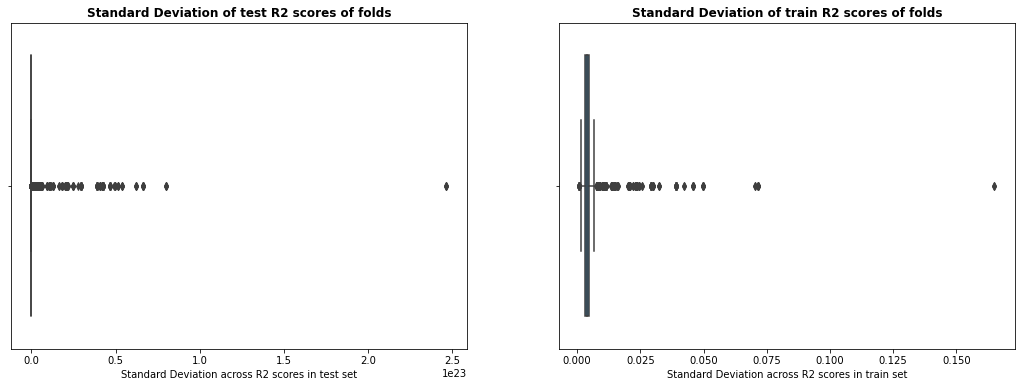

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.boxplot(data=df_report, x='r2_std_test_folds', ax=ax[0])
ax[0].set_title('Standard Deviation of test R2 scores of folds', 
                weight='bold')
ax[0].set_xlabel('Standard Deviation across R2 scores in test set')

sns.boxplot(data=df_report, x='r2_std_train_folds', ax=ax[1])
ax[1].set_title('Standard Deviation of train R2 scores of folds', 
                weight='bold')
ax[1].set_xlabel('Standard Deviation across R2 scores in train set')

plt.show()

- Higher standard deviation will explain the difference among the scores of each folds.
- Hence, the lower the standard deviation better 

In [92]:
df_wrt_pca = df_report.pivot_table(index='PCA_n_components', 
                                   values=['r2_avg_train_folds', 'r2_avg_test_fold'], 
                                   aggfunc=np.max)
df_wrt_pca

,r2_avg_test_fold,r2_avg_train_folds
PCA_n_components,,
0.05,0.756502,0.780883
0.10,0.756502,0.780883
0.15,0.756502,0.780883
0.20,0.760497,0.788003
0.25,0.771459,0.789968
0.30,0.776176,0.801435
0.35,0.775891,0.801790
0.40,0.783337,0.807083
0.45,0.783902,0.796951


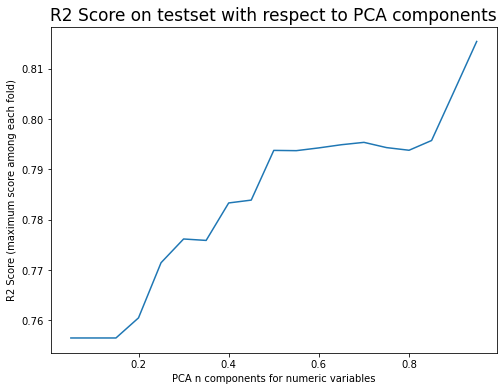

In [110]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df_wrt_pca, 
             y='r2_avg_test_fold',
             x= df_wrt_pca.index)
plt.xlabel('PCA n components for numeric variables')
plt.ylabel('R2 Score (maximum score among each fold)')
plt.title('R2 Score on testset with respect to PCA components', 
          fontsize=17)
plt.show()

- It is obvious that higher a higher PCA n_component ratio is bringing higher R2 accuracy

Lets check for the other parameters

In [101]:
df_wrt_nfreq = df_report.pivot_table(index='n_frequency_cutoff', 
                                     values=['r2_avg_train_folds', 'r2_avg_test_fold'], 
                                     aggfunc=np.max)
df_wrt_nfreq

,r2_avg_test_fold,r2_avg_train_folds
n_frequency_cutoff,,
0.50,0.813731,0.829539
0.55,0.805782,0.830184
0.60,0.805782,0.830184
0.65,0.805782,0.830184
0.70,0.805782,0.830184
0.75,0.812806,0.831163
0.80,0.809953,0.834741
0.85,0.810334,0.836044
0.90,0.815433,0.843484


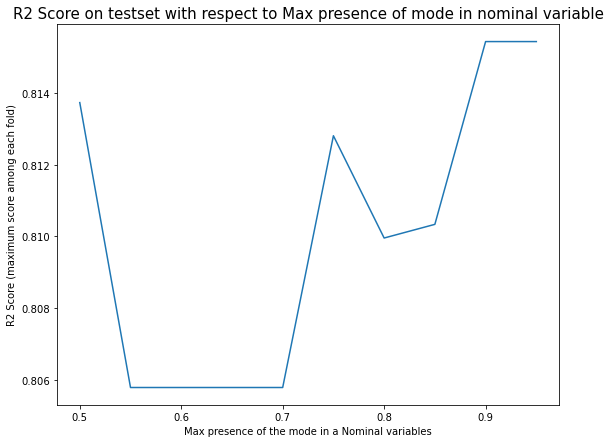

In [116]:
plt.figure(figsize=(9,7))
sns.lineplot(data=df_wrt_nfreq, 
             y='r2_avg_test_fold', 
             x = df_wrt_nfreq.index)
plt.xlabel('Max presence of the mode in a Nominal variables')
plt.ylabel('R2 Score (maximum score among each fold)')
plt.title('R2 Score on testset with respect to Max presence of mode in nominal variable', 
          fontsize=15)
plt.show()

- The situation with respect to the presence of most occuring value and R-squared score is unclear.
- There is a minor range of change but it definitely requires more attention.

In [98]:
df_wrt_nthresh = df_report.pivot_table(index='n_unique_threshold', 
                                       values=['r2_avg_train_folds', 'r2_avg_test_fold'], 
                                       aggfunc=np.max)
df_wrt_nthresh

,r2_avg_test_fold,r2_avg_train_folds
n_unique_threshold,,
6,0.811153,0.824806
7,0.815050,0.830926
8,0.814215,0.832028
9,0.815433,0.834717
10,0.815433,0.834717
11,0.815433,0.834717
12,0.815433,0.834717
13,0.815433,0.834717
14,0.815433,0.834717


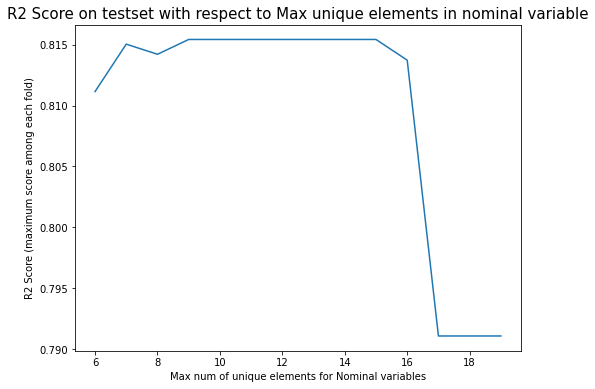

In [117]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df_wrt_nthresh, 
             y='r2_avg_test_fold', 
             x = df_wrt_nthresh.index)
plt.xlabel('Max num of unique elements for Nominal variables')
plt.ylabel('R2 Score (maximum score among each fold)')
plt.title('R2 Score on testset with respect to Max unique elements in nominal variable', 
          fontsize=15)
plt.show()

- The ideal threshold for the uniqueness in nominal columns is somewhere between 9 and 15

In [54]:
df_report['r2_avg_test_fold'].max()

0.8154329899186223

In [57]:
df_report.iloc[df_report['r2_avg_test_fold'].idxmax(), :]

PCA_n_components          0.950000
n_frequency_cutoff        0.900000
n_unique_threshold        9.000000
r2_avg_train_folds        0.834717
r2_std_train_folds        0.004781
r2_avg_test_fold          0.815433
r2_std_test_folds         0.024169
avg_mae              -23000.353716
Name: 2635, dtype: float64

In [62]:
df_report.iloc[abs(df_report['avg_mae']).idxmin(), :]

PCA_n_components          0.950000
n_frequency_cutoff        0.900000
n_unique_threshold        9.000000
r2_avg_train_folds        0.834717
r2_std_train_folds        0.004781
r2_avg_test_fold          0.815433
r2_std_test_folds         0.024169
avg_mae              -23000.353716
Name: 2635, dtype: float64

**Observations:**
- So far, the best test accuracy I've found is around 0.815. The train accuracy of the couple is a bit higher, i-e, 0.834.
- The minimum mean absolute error is also found in the same band, that is USD 23000
- Other parameters such as `PCA_n_components`, `n_frequency_cutoff`, and `n_unique_threshold` corroborate the findings of above plots with values of 0.95, 0.9, and 9, respectively

**What can be done next?**
- We still have some space to increase the PCA_n_components. Since there is a promising trend that it is directly propotional to R2 score
- Other linear models such as Lasso, Ridge can be used

Lets try increasing n_component ratio of PCA 

In [230]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.995, 0.90, 9)

# Cross Validation
print('Cross Validation Method')
print(train_and_test(selected_data, cv_mode=True))

# On Test set
print('Test Set')
print(train_and_test(selected_data, cv_mode=False))

Cross Validation Method
(0.847661877654831, 0.006545045609750052, 0.8263824874393683, 0.03451749726740296, -21946.568216322452)
Test Set
(0.845577026150543, 0.8008103892819278, 20874.521046643913, 31666.96262352568)


- There is not a significant change. Cross Validation results are slightly better in terms of R2 score of **0.826**
- However, the test set results are better in Mean Absolute Error with MAE at **USD 20874**

### Lets try Ridge and Lasso Regression and see if it offers some improvement
using the same parameters 

#### Ridge

In [231]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.995, 0.90, 9)

In [233]:
selected_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 2_480.0,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,SalePrice
0,-0.078792,-1.521552,1.386799,2.792893,0.416826,0.721429,-0.074278,0.963385,-1.039672,-0.142859,-1.013395,0.436753,-0.943400,0.333823,1.262454,1.511071,-0.244729,-1.274446,-0.048775,-0.651197,1.540378,1.385115,2.235705,-0.123197,-0.874095,-0.777794,1.272697,0.101317,-1.047403,-0.332519,0.273305,0.600646,0.591678,-0.529337,-0.071676,-0.367421,-0.324709,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,215000
1,2.789871,-2.547263,0.536337,0.245766,-0.770047,0.313865,0.368344,-1.390310,-0.711131,-0.804172,1.162411,-0.333184,-0.036262,-0.549855,-0.130698,-0.299615,-0.089606,1.191211,-1.662080,-1.734835,-1.207638,1.665634,0.023738,0.730435,0.648458,0.393123,-0.420352,-0.469364,-0.395349,0.417518,-0.268992,0.346524,-1.252755,-0.308419,0.059701,-0.163811,-0.669504,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,105000
2,0.484027,-1.313923,0.976905,0.840214,-0.769812,1.500782,0.625792,-1.167440,1.728263,-0.362631,-3.205418,1.227995,0.800784,-0.704113,-2.142303,2.966257,-0.580047,-0.252527,-0.384722,0.122549,-0.686208,-0.502709,1.593270,0.998746,-0.577533,-0.035284,-0.450235,-1.134968,-0.629504,-0.612043,-0.266468,-0.005621,-1.269482,-0.419126,0.210547,0.278542,0.318461,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,172000
3,-1.682379,-0.768568,0.396872,1.715553,-0.317370,-1.109321,-0.906371,-0.641188,-0.229866,-1.059201,-0.264179,-0.044468,0.374912,0.493775,0.062028,-0.184209,0.338478,-0.614945,0.740410,-0.185571,-0.493493,-0.014248,-0.558611,-1.417320,-0.561337,0.208520,0.496276,0.924452,1.017045,-1.799038,0.630398,-0.636223,-0.993876,1.207525,-0.212378,0.568744,0.639374,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,244000
4,-1.285662,0.801898,1.294944,-0.697366,0.609532,0.502932,0.660831,-0.228735,-0.008078,-0.163720,-1.295508,0.199462,-0.843908,0.191090,0.782067,0.619056,-0.052941,0.375739,-0.362397,-0.468507,0.492380,0.247744,-0.192256,-1.032288,0.172509,0.414338,0.271863,-0.061406,-0.173526,0.668892,-0.740151,-0.143531,-0.783296,0.311967,0.982457,-0.418847,-0.153482,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,189900


In [248]:
X = selected_data.drop('SalePrice', axis=1).values
y = selected_data['SalePrice'].values

In [249]:
# Parameter Grid 
ridge_param_grid = {'alpha':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

In [250]:
# GridSearchCV will use Cross Validation
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5)

In [254]:
# However, to avoid overfitting parameters, the data will be still split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [255]:
# Fit 
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [256]:
print('Test set score: ', ridge_grid_search.score(X_test, y_test))

Test set score:  0.8437109245887638


- We certainly have a better test R2 score. 

Lets dig in further to check the parameters

In [257]:
print('Best estimator:\n{}'.format(ridge_grid_search.best_estimator_))

Best estimator:
Ridge(alpha=10.0)


#### Lasso

In [259]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.995, 0.90, 9)

In [260]:
selected_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFin Type 2_480.0,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,SalePrice
0,-0.078792,-1.521552,1.386799,2.792893,0.416826,0.721429,-0.074278,0.963385,-1.039672,-0.142859,-1.013395,0.436753,-0.943400,0.333823,1.262454,1.511071,-0.244729,-1.274446,-0.048775,-0.651197,1.540378,1.385115,2.235705,-0.123197,-0.874095,-0.777794,1.272697,0.101317,-1.047403,-0.332519,0.273305,0.600646,0.591678,-0.529337,-0.071676,-0.367421,-0.324709,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,215000
1,2.789871,-2.547263,0.536337,0.245766,-0.770047,0.313865,0.368344,-1.390310,-0.711131,-0.804172,1.162411,-0.333184,-0.036262,-0.549855,-0.130698,-0.299615,-0.089606,1.191211,-1.662080,-1.734835,-1.207638,1.665634,0.023738,0.730435,0.648458,0.393123,-0.420352,-0.469364,-0.395349,0.417518,-0.268992,0.346524,-1.252755,-0.308419,0.059701,-0.163811,-0.669504,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,105000
2,0.484027,-1.313923,0.976905,0.840214,-0.769812,1.500782,0.625792,-1.167440,1.728263,-0.362631,-3.205418,1.227995,0.800784,-0.704113,-2.142303,2.966257,-0.580047,-0.252527,-0.384722,0.122549,-0.686208,-0.502709,1.593270,0.998746,-0.577533,-0.035284,-0.450235,-1.134968,-0.629504,-0.612043,-0.266468,-0.005621,-1.269482,-0.419126,0.210547,0.278542,0.318461,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,172000
3,-1.682379,-0.768568,0.396872,1.715553,-0.317370,-1.109321,-0.906371,-0.641188,-0.229866,-1.059201,-0.264179,-0.044468,0.374912,0.493775,0.062028,-0.184209,0.338478,-0.614945,0.740410,-0.185571,-0.493493,-0.014248,-0.558611,-1.417320,-0.561337,0.208520,0.496276,0.924452,1.017045,-1.799038,0.630398,-0.636223,-0.993876,1.207525,-0.212378,0.568744,0.639374,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,244000
4,-1.285662,0.801898,1.294944,-0.697366,0.609532,0.502932,0.660831,-0.228735,-0.008078,-0.163720,-1.295508,0.199462,-0.843908,0.191090,0.782067,0.619056,-0.052941,0.375739,-0.362397,-0.468507,0.492380,0.247744,-0.192256,-1.032288,0.172509,0.414338,0.271863,-0.061406,-0.173526,0.668892,-0.740151,-0.143531,-0.783296,0.311967,0.982457,-0.418847,-0.153482,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,189900


In [261]:
X = selected_data.drop('SalePrice', axis=1).values
y = selected_data['SalePrice'].values

In [262]:
# Parameter Grid 
lasso_param_grid = {'alpha':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

In [263]:
# GridSearchCV will use Cross Validation
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5)

In [264]:
# However, to avoid overfitting parameters, the data will be still split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [265]:
# Fit 
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [266]:
# Test Score
print('Test set score: ', lasso_grid_search.score(X_test, y_test))

Test set score:  0.8453314302825581


In [267]:
print('Best estimator:\n{}'.format(lasso_grid_search.best_estimator_))

Best estimator:
Lasso(alpha=100.0)


**Observations:**
- Ridge and Lasso, both are able to produce better results than OLS. 
- The range of alphas can be further narrowed down closer to the best alpha found to check for improvement

In [279]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.995, 0.90, 9)

X = selected_data.drop('SalePrice', axis=1).values
y = selected_data['SalePrice'].values

# Parameter Grid 
ridge_param_grid = {'alpha':np.arange(8,15,1)}

# GridSearchCV will use Cross Validation
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5)

# However, to avoid overfitting parameters, the data will be still split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Fit 
ridge_grid_search.fit(X_train, y_train)

# Predict
y_pred = ridge_grid_search.predict(X_test)
mae = mean_absolute_error(y_pred, y_test)
print('MAE: ', mae)

# Test Score
print('Test set score: ', ridge_grid_search.score(X_test, y_test))

print('Best estimator:\n{}'.format(ridge_grid_search.best_estimator_))

MAE:  21638.975109636936
Test set score:  0.8439847996296352
Best estimator:
Ridge(alpha=13)


In [280]:
ames = pd.read_table('AmesHousing.tsv', delimiter="\t")

transformed_data = transform_features(ames)

selected_data = select_features(transformed_data, 0.995, 0.90, 9)

X = selected_data.drop('SalePrice', axis=1).values
y = selected_data['SalePrice'].values

# Parameter Grid 
lasso_param_grid = {'alpha':np.arange(30, 120, 10)}

# GridSearchCV will use Cross Validation
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5)

# However, to avoid overfitting parameters, the data will be still split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Fit 
lasso_grid_search.fit(X_train, y_train)

# Predict
y_pred = lasso_grid_search.predict(X_test)
mae = mean_absolute_error(y_pred, y_test)
print('MAE: ', mae)

# Test Score
print('Test set score: ', lasso_grid_search.score(X_test, y_test))
print('Best estimator:\n{}'.format(lasso_grid_search.best_estimator_))

MAE:  21681.63096752905
Test set score:  0.8441151111707371
Best estimator:
Lasso(alpha=50)


In [297]:
lasso = Lasso(alpha=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print('R2 Score', r2)
print('MAE', mae)

R2 Score 0.8376872097791501
MAE 21681.63096752905


---
## Conclusions:
1. The dataset was small, hence Splitting the data into train and test couldn't produce the sustainable results, and due to the same reason, Cross Validation was chosen and used.
2. Ridge and Lasso with adjusted parameters, performed better than Linear Regression (OLS)
3. At best, we have an R2 score of around 84% and Mean absolute error of around USD 21700
4. It is yet to be seen that how'd lasso and ridge perform on pre defined parameters such as pca components ratio for numeric features and number of unique elements and presence of most occuring element for nominal feautures.
5. Futhermore, other algorithms can also be used. Usually, KNN is recommended for smaller datasets.
